<font size="4"> <b>Introduction</b><br><font size="2">The purpose of this analysis is to predict which customers will subscribe "Halfway There" service by conducting exploratory data analysis, feature treatment and engineering, and utilizing classification modeling techniques.

<font size="3"><b>Part 1: Exploratory Data Analysis</b>

In [1]:
# importing libraries
import numpy as np                                      # data science essentials
import pandas as pd                                     # data science essentials
import random as rand                                   # random number gen
import matplotlib.pyplot as plt                         # essential graphical output
import seaborn as sns                                   # enhanced graphic output
import statsmodels.formula.api as smf                   # regression modeling
from sklearn import preprocessing                       # for data standardization
from sklearn.preprocessing import MinMaxScaler          # Feature scaling
from sklearn.preprocessing import StandardScaler        # Feature scaling
from sklearn.model_selection import train_test_split    # train/test split
from sklearn.linear_model import LogisticRegression     # logistic regression
from sklearn.metrics import confusion_matrix            # confusion matrix
from sklearn.metrics import roc_auc_score               # auc score
from sklearn.neighbors import KNeighborsClassifier      # KNN for classification
from sklearn.neighbors import KNeighborsRegressor       # KNN for regression
from sklearn.preprocessing import StandardScaler        # standard scaler
from sklearn.tree import DecisionTreeClassifier         # classification trees
from sklearn.tree import export_graphviz                # exports graphics
from sklearn.externals.six import StringIO              # saves objects in memory
from IPython.display import Image                       # displays on frontend
import pydotplus                                        # interprets dot objects
from sklearn.model_selection import GridSearchCV        # hyperparameter tuning
from sklearn.metrics import make_scorer                 # customizable scorer
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm
from xgboost import XGBClassifier                       # extreme gradient boosting
from sklearn.decomposition import PCA                   # principal components analysis
from matplotlib.colors import ListedColormap            # enhanced graphic output

# loading data
original_df = pd.read_excel('Apprentice_Chef_Dataset.xlsx')

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
original_df.head(n = 5)

C:\Users\isabe\New Folder\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


REVENUE  CROSS_SELL_SUCCESS                              NAME                                     EMAIL FIRST_NAME  FAMILY_NAME  TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  PRODUCT_CATEGORIES_VIEWED  AVG_TIME_PER_SITE_VISIT  MOBILE_NUMBER  CANCELLATIONS_BEFORE_NOON  CANCELLATIONS_AFTER_NOON  TASTES_AND_PREFERENCES  MOBILE_LOGINS  PC_LOGINS  WEEKLY_PLAN  EARLY_DELIVERIES  LATE_DELIVERIES  PACKAGE_LOCKER  REFRIGERATED_LOCKER  FOLLOWED_RECOMMENDATIONS_PCT  AVG_PREP_VID_TIME  LARGEST_ORDER_SIZE  MASTER_CLASSES_ATTENDED  MEDIAN_MEAL_RATING  AVG_CLICKS_PER_VISIT  TOTAL_PHOTOS_VIEWED
0   1880.0                   1                      Addam Osgrey                 addam.osgrey@passport.com      Addam       Osgrey                  118                   4                            7                          5                    86.00              1                          2                         1                       0              6          2            8                 0                2               1                    0                            90              165.8                   6                        1                   3                    11                    0
1   1495.0                   1                   Aegon Blackfyre                   aegon.blackfyre@jnj.com      Aegon    Blackfyre                   44                   3                            6                          3                   125.60              1                          0                         1                       0              6          1            8                 0                4               1                    0                            90              150.5                   4                        1                   3                    13                   90
2   2572.5                   1         Aegon Frey (son of Aenys)       aegon.frey.(son.of.aenys)@gmail.com      Aegon        Frey                    38                   1                            5                          3                    58.00              1                          5                         0                       1              6          2           14                 0                0               0                    0                            80               99.6                   3                        0                   3                    12                    0
3   1647.0                   1  Aegon Targaryen (son of Rhaegar)  aegon.targaryen.(son.of.rhaegar)@ibm.com      Aegon   Targaryen                    76                   3                            8                         10                    45.51              0                          3                         0                       1              6          1           11                 5                4               0                    0                            90              125.0                   3                        0                   3                    13                    0
4   1923.0                   1                 Aegon V Targaryen         aegon.v.targaryen@goldmansacs.com      Aegon  V Targaryen                   65                   3                            6                          9                   106.00              1                          1                         1                       0              6          2           12                 0                4               1                    0                            90              135.3                   3                        1                   3                    13                  253

Define mv_flagger and text_split_feature functions here. They will be used later.

In [2]:
# user-defined functions

#########################
# mv_flagger
#########################
def mv_flagger(df):
    """
Flags all columns that have missing values with 'm-COLUMN_NAME'.

PARAMETERS
----------
df : DataFrame to flag missing values


RETURNS
-------
DataFrame with missing value flags."""


    for col in df:

        if df[col].isnull().astype(int).sum() > 0:
            df['m_'+col] = df[col].isnull().astype(int)
            
    return df



#########################
# text_split_feature
#########################
def text_split_feature(col, df, sep=' ', new_col_name='number_of_names'):
    """
Splits values in a string Series (as part of a DataFrame) and sums the number
of resulting items. Automatically appends summed column to original DataFrame.

PARAMETERS
----------
col          : column to split
df           : DataFrame where column is located
sep          : string sequence to split by, default ' '
new_col_name : name of new column after summing split, default
               'number_of_names'
"""
    
    df[new_col_name] = 0
    
    
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))

Load the original_df data dictionary('Apprentice_Chef_Data_Dictionary.xlsx') and determine which features don't matter to the effectiveness of cross-selling promotion.

In [3]:
# pulling up data dictionary
original_df_description = pd.read_excel('Apprentice_Chef_Data_Dictionary.xlsx')

# displaying the data dictionary
original_df_description

Column Data Type                                                                    Description
0                        REVENUE     Float                                      Total revenue generated from the customer
1             CROSS_SELL_SUCCESS   Integer                                             Success of promoting Halfway There
2                           NAME    string                                                          Full name of customer
3                          EMAIL    string                                                              Email of customer
4                     FIRST_NAME    string                                                                     First name
5                    FAMILY_NAME    string                                                                      Last name
6            TOTAL_MEALS_ORDERED   Integer                     The total amount of meals orderd by the customer up to day
7             UNIQUE_MEALS_PURCH   Integer                              Number of uniqe meal sets ordered by the customer
8    CONTACTS_W_CUSTOMER_SERVICE   Integer                  Number of times customer was in contact with customer service
9      PRODUCT_CATEGORIES_VIEWED   Integer                                         Total number of meal categories viewed
10       AVG_TIME_PER_SITE_VISIT     Float                                  Average time the customer spends on the site 
11                 MOBILE_NUMBER   Integer                            Customer mobile number on recored (1 = yes, 0 = no)
12     CANCELLATIONS_BEFORE_NOON   Integer                Number of meals canceled before 12 PM as per canceletion policy
13      CANCELLATIONS_AFTER_NOON   Integer                  Number of meals canceled after 3 PM as per canceletion policy
14        TASTES_AND_PREFERENCES   Integer               Customer specified their tastes and preferences in their profile
15                 MOBILE_LOGINS   Integer                                    Total number of logins from a mobile device
16                     PC_LOGINS   Integer                                          Total number of logins from a desktop
17                   WEEKLY_PLAN   Integer                               Number of times customer ordered the weekly plan
18              EARLY_DELIVERIES   Integer                                                         Before delivery window
19               LATE_DELIVERIES   Integer                                                          After delivery window
20                PACKAGE_LOCKER   Integer               Customer's building has a package locker service or package room
21           REFRIGERATED_LOCKER   Integer                                                   Package room is refrigerated
22  FOLLOWED_RECOMMENDATIONS_PCT     Float  Precentage of time customer folloed the meal recomandation generated for them
23             AVG_PREP_VID_TIME     Float            Average time in seconeds meal prep instruction video was waspalying
24            LARGEST_ORDER_SIZE   Integer                                   Largest number of meals ordered in one order
25       MASTER_CLASSES_ATTENDED   Integer                                 Did the customer attend a cooking master class
26            MEDIAN_MEAL_RATING   Integer                                             Median rating of meals by customer
27          AVG_CLICKS_PER_VISIT     Float                                        Average number of clicks per site visit
28           TOTAL_PHOTOS_VIEWED   Integer                                               Total number of clicks on photos

<b>Missing Value Detection</b>

In [4]:
# checking for missing values
original_df.isnull().sum()

REVENUE                          0
CROSS_SELL_SUCCESS               0
NAME                             0
EMAIL                            0
FIRST_NAME                       0
FAMILY_NAME                     47
TOTAL_MEALS_ORDERED              0
UNIQUE_MEALS_PURCH               0
CONTACTS_W_CUSTOMER_SERVICE      0
PRODUCT_CATEGORIES_VIEWED        0
AVG_TIME_PER_SITE_VISIT          0
MOBILE_NUMBER                    0
CANCELLATIONS_BEFORE_NOON        0
CANCELLATIONS_AFTER_NOON         0
TASTES_AND_PREFERENCES           0
MOBILE_LOGINS                    0
PC_LOGINS                        0
WEEKLY_PLAN                      0
EARLY_DELIVERIES                 0
LATE_DELIVERIES                  0
PACKAGE_LOCKER                   0
REFRIGERATED_LOCKER              0
FOLLOWED_RECOMMENDATIONS_PCT     0
AVG_PREP_VID_TIME                0
LARGEST_ORDER_SIZE               0
MASTER_CLASSES_ATTENDED          0
MEDIAN_MEAL_RATING               0
AVG_CLICKS_PER_VISIT             0
TOTAL_PHOTOS_VIEWED 

<b>Flagging Missing Values</b><br>By using mv_flagger function (which is defined before), we can flag the missing values much easilier.

In [5]:
# running the mv_flagger function
original_df = mv_flagger(df = original_df)

# checking results
original_df.columns

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'MOBILE_LOGINS', 'PC_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'm_FAMILY_NAME'], dtype='object')

<b>Missing Value Strategy</b>

In [6]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   REVENUE                       1946 non-null   float64
 1   CROSS_SELL_SUCCESS            1946 non-null   int64  
 2   NAME                          1946 non-null   object 
 3   EMAIL                         1946 non-null   object 
 4   FIRST_NAME                    1946 non-null   object 
 5   FAMILY_NAME                   1899 non-null   object 
 6   TOTAL_MEALS_ORDERED           1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH            1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE   1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED     1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT       1946 non-null   float64
 11  MOBILE_NUMBER                 1946 non-null   int64  
 12  CANCELLATIONS_BEFORE_NOON     1946 non-null   int64  
 13  CAN

As "FAMILY_NAME" is not numeric, impute "FAMILY_NAME" with "Unknown" directly.

In [7]:
# imputing missing values
original_df['FAMILY_NAME'] = original_df['FAMILY_NAME'].fillna('Unknown')

# checking results
original_df['FAMILY_NAME'].isnull().sum()

0

In [8]:
# saving results
original_df.to_excel('chef_feature_rich.xlsx',
                     index = False)

In [9]:
# loading saved file
original_df = pd.read_excel('chef_feature_rich.xlsx')

<font size="3"><b>Part 2: Feature Treatment and Engineering</b>

<b>Adding More Features</b>

- <b>Number of Names</b><br> Some customers even put their title, or relationship with other customers in the "NAME" column, which causes the name look longer. We should be cautious with the family, and find them. Those people who left more information in the "NAME" may be our future target customer as they are willing to take more time in the registration process.

By using text_split_feature function (which is defined before), we can see different groups of number of names.

In [10]:
# calling text_split_feature
text_split_feature(col = 'NAME', df = original_df)

# checking results
original_df['number_of_names'].value_counts()

2    1201
1     591
3      98
5      35
6      12
4       9
Name: number_of_names, dtype: int64

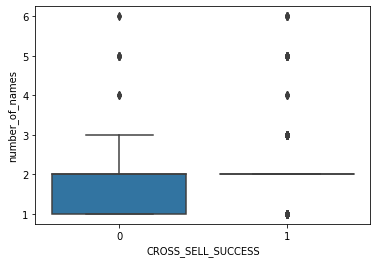

In [11]:
sns.boxplot(x="CROSS_SELL_SUCCESS", y="number_of_names", data=original_df)
plt.show()

According to the boxplot, let's set the number of names below 2 (including 2) as 0, and those above 2 as 1.

In [12]:
# placeholder list
placeholder_lst = []

# looping to group observations by element
for element in original_df['number_of_names']:
    if element <= 2:
        placeholder_lst.append(0)
    elif element > 2:
        placeholder_lst.append(1)

# concatenating with original DataFrame
original_df['degree_of_number_of_names'] = pd.Series(placeholder_lst)

# checking results
original_df['degree_of_number_of_names'].value_counts()


0    1792
1     154
Name: degree_of_number_of_names, dtype: int64

In [13]:
# saving results
original_df.to_excel('chef_feature_rich.xlsx',
                     index = False)

In [14]:
# loading saved file
original_df = pd.read_excel('chef_feature_rich.xlsx')

- <b>Big Family</b><br> Let's take a look at the "FAMILY_NAME" first

In [15]:
family_name_freq = original_df['FAMILY_NAME'].value_counts().sort_values(ascending = False)
family_name_freq

Frey           79
Unknown        47
Stark          32
Lannister      29
Tyrell         28
               ..
Bors            1
Westerling      1
the Clever      1
Tym             1
Bharbo          1
Name: FAMILY_NAME, Length: 1071, dtype: int64

As we can see from the result, customers in Frey family occur most frequently on our record, and followed by Stark, Lannister, and Tyrell. I assume that if the family name frequency is above 5 (including 5), this family will most probably be a big family.

In [16]:
# placeholder list
placeholder_lst = []

# looping to group observations by element
for element in original_df['FAMILY_NAME']:
    if element in ['Frey', 'Stark', 'Lannister', 'Tyrell', 'Targaryen', 'Hightower', 'Greyjoy', 'Florent',
                   'Vance', 'Royce', 'Botley', 'Rivers', 'Martell', 'Baratheon', 'Harlaw', 'Bracken', 'Arryn', 
                   'Sand', 'Velaryon', 'Waynwood', 'Seaworth', 'Flowers', 'Crakehall', 'Fossoway', 'Karstark', 
                   'I Targaryen', 'Swann', 'Westerling', 'Plumm', 'Mormont', 'Redwyne', 'Osgrey', 'Wylde',
                   'Brax', 'Paege', 'Goodbrother', 'Drumm', 'zo Loraq', 'Darry', 'Manderly', 'Swyft', 'Glover',
                   'Mallister', 'Dayne', 'Beesbury', 'Estermont', 'Tallhart', 'Tully', 'Oakheart', 'II Targaryen',
                   'Caswell', 'Haigh', 'Ryswell', 'Flint', 'Blackwood', 'Crane', 'Norcross', 'Whent', 'Farwynd',
                   'Heddle', 'Hollard', 'Redfort']:
        placeholder_lst.append(1)       
    else:
        placeholder_lst.append(0)
        
# concatenating with original DataFrame
original_df['BIG_FAMILY'] = pd.Series(placeholder_lst)

# checking results
original_df['BIG_FAMILY'].value_counts()


0    1311
1     635
Name: BIG_FAMILY, dtype: int64

In [17]:
# saving results
original_df.to_excel('chef_feature_rich.xlsx',
                     index = False)

In [18]:
# loading saved file
original_df = pd.read_excel('chef_feature_rich.xlsx')

- <b>Email Domain Group</b><br>As from the email domain, we can tell whether the customers are working or not, and also we can evaluate how interested the customers are in our service.

In [19]:
# STEP 1: splitting personal emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in original_df.iterrows():
    
    # splitting email domain at '@'
    split_email = original_df.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
email_df

0                1
0                         addam.osgrey     passport.com
1                      aegon.blackfyre          jnj.com
2            aegon.frey.(son.of.aenys)        gmail.com
3     aegon.targaryen.(son.of.rhaegar)          ibm.com
4                    aegon.v.targaryen  goldmansacs.com
...                                ...              ...
1941                            yandry        yahoo.com
1942                            yorkel        gmail.com
1943                       young.henly        gmail.com
1944                            ysilla   protonmail.com
1945                      ysilla.royce      hotmail.com

[1946 rows x 2 columns]

In [20]:
# STEP 2: concatenating with original DataFrame

# renaming column to concatenate
email_df.columns = ['ID', 'EMAIL_DOMAIN']


# concatenating personal_email_domain with friends DataFrame
original_df = pd.concat([original_df, email_df.loc[:, 'EMAIL_DOMAIN']],
                        axis = 1)


# printing value counts of personal_email_domain
original_df.loc[: ,'EMAIL_DOMAIN'].value_counts()

gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
jnj.com              28
merck.com            28
cocacola.com         28
mcdonalds.com        28
nike.com             27
apple.com            27
ge.org               26
dupont.com           26
ibm.com              26
chevron.com          25
microsoft.com        25
exxon.com            24
travelers.com        24
unitedhealth.com     24
boeing.com           23
verizon.com          22
pg.com               22
mmm.com              22
caterpillar.com      22
disney.com           21
walmart.com          21
pfizer.com           20
visa.com             20
jpmorgan.com         19
unitedtech.com       18
cisco.com            18
goldmansacs.com      18
homedepot.com        17
intel.com            17
Name: EMAIL_DOMAIN, dtype: int64

In [21]:
# printing the sum of value counts of personal_email_domain
original_df.loc[: ,'EMAIL_DOMAIN'].value_counts().sum()

1946

In [22]:
# email domain types
professional_email_domains = ['@mmm.com', '@amex.com', '@apple.com', '@boeing.com', '@caterpillar.com',
                             '@chevron.com', '@cisco.com', '@cocacola.com', '@disney.com', '@dupont.com',
                             '@exxon.com', '@ge.org', '@goldmansacs.com', '@homedepot.com', '@ibm.com', 
                             '@intel.com', '@jnj.com', '@jpmorgan.com', '@mcdonalds.com', '@merck.com',
                             '@microsoft.com', '@nike.com', '@pfizer.com', '@pg.com', '@travelers.com',
                             '@unitedtech.com', '@unitedhealth.com', '@verizon.com', '@visa.com', '@walmart.com']
personal_email_domains  = ['@gmail.com', '@yahoo.com', '@protonmail.com']
junk_email_domains = ['@me.com', '@aol.com', '@hotmail.com', '@live.com', '@msn.com', '@passport.com']

# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in original_df['EMAIL_DOMAIN']:
        if '@' + domain in professional_email_domains:
            placeholder_lst.append('professional')
            
        elif '@' + domain in personal_email_domains:
            placeholder_lst.append('personal')
            
        elif '@' + domain in junk_email_domains:
            placeholder_lst.append('junk')
            
        else:
            print('Unknown')

# concatenating with original DataFrame
original_df['DOMAIN_GROUP'] = pd.Series(placeholder_lst)

# checking results
original_df['DOMAIN_GROUP'].value_counts()

personal        861
professional    696
junk            389
Name: DOMAIN_GROUP, dtype: int64

From the number of professional email domains, we can be sure that there're at least 35.8% customers are professionals.

In [23]:
# saving results
original_df.to_excel('chef_feature_rich.xlsx',
                     index = False)

In [24]:
# loading saved file
original_df = pd.read_excel('chef_feature_rich.xlsx')

Replace "personal" as 0, "professional" as 1, and "junk" as 2, in order to make it easier to do the feature engineering.

In [25]:
original_df['DOMAIN_GROUP'].replace(to_replace = ['personal', 'professional', 'junk'],
                                    value = [0, 1, 2],
                                    inplace = True)

In [26]:
# saving results
original_df.to_excel('chef_feature_rich.xlsx',
                     index = False)

In [27]:
# loading saved file
original_df = pd.read_excel('chef_feature_rich.xlsx')

- <b>Degree of Followed Recommendation</b>

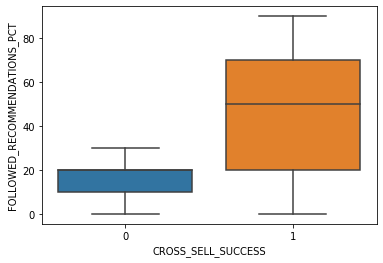

In [28]:
sns.boxplot(x="CROSS_SELL_SUCCESS", y="FOLLOWED_RECOMMENDATIONS_PCT", data=original_df)
plt.show()

Set the customers who followed recommendation below 20% as 0, and those above 20% (including 20%) as 1.

In [29]:
# placeholder list
placeholder_lst = []

# looping to group observations by element
for element in original_df['FOLLOWED_RECOMMENDATIONS_PCT']:
    if element < 20:
        placeholder_lst.append(0)
    elif element >= 20:
        placeholder_lst.append(1)

# concatenating with original DataFrame
original_df['DEGREE_OF_FOLLOWED_RECOMMENDATION'] = pd.Series(placeholder_lst)

# checking results
original_df['DEGREE_OF_FOLLOWED_RECOMMENDATION'].value_counts()


1    1387
0     559
Name: DEGREE_OF_FOLLOWED_RECOMMENDATION, dtype: int64

In [30]:
# saving results
original_df.to_excel('chef_feature_rich.xlsx',
                     index = False)

In [31]:
# loading saved file
original_df = pd.read_excel('chef_feature_rich.xlsx')

- <b> Login per Order</b>

In [32]:
original_df['LOGIN_PER_ORDER'] = (original_df['MOBILE_LOGINS'] + original_df['PC_LOGINS'])/original_df['TOTAL_MEALS_ORDERED']

In [33]:
# saving results
original_df.to_excel('chef_feature_rich.xlsx',
                     index = False)

In [34]:
# loading saved file
original_df = pd.read_excel('chef_feature_rich.xlsx')

- <b>Contract per Order</b>

In [35]:
original_df['CONTRACT_PER_ORDER'] = original_df['CONTACTS_W_CUSTOMER_SERVICE']/original_df['TOTAL_MEALS_ORDERED']

In [36]:
# saving results
original_df.to_excel('chef_feature_rich.xlsx',
                     index = False)

In [37]:
# loading saved file
original_df = pd.read_excel('chef_feature_rich.xlsx')

- <b>Largest Size per Order</b>

In [38]:
original_df['LARGEST_SIZE_PER_ORDER'] = original_df['LARGEST_ORDER_SIZE']/original_df['TOTAL_MEALS_ORDERED']

In [39]:
# saving results
original_df.to_excel('chef_feature_rich.xlsx',
                     index = False)

In [40]:
# loading saved file
original_df = pd.read_excel('chef_feature_rich.xlsx')

- <b>Unique Meals Purchased per Order</b>

In [41]:
original_df['UNIQUE_MEALS_PURCH_PER_ORDER'] = original_df['UNIQUE_MEALS_PURCH']/original_df['TOTAL_MEALS_ORDERED']

In [42]:
# saving results
original_df.to_excel('chef_feature_rich.xlsx',
                     index = False)

In [43]:
# loading saved file
original_df = pd.read_excel('chef_feature_rich.xlsx')

- <b>Cancellation before Noon per Order</b>

In [44]:
original_df['CANCELLATION_BEFORE_NOON_PER_ORDER'] = original_df['CANCELLATIONS_BEFORE_NOON']/original_df['TOTAL_MEALS_ORDERED']

In [45]:
# saving results
original_df.to_excel('chef_feature_rich.xlsx',
                     index = False)

In [46]:
# loading saved file
original_df = pd.read_excel('chef_feature_rich.xlsx')

- <b>Cancellation after Noon per Order</b>

In [47]:
original_df['CANCELLATION_AFTER_NOON_PER_ORDER'] = original_df['CANCELLATIONS_AFTER_NOON']/original_df['TOTAL_MEALS_ORDERED']

In [48]:
# saving results
original_df.to_excel('chef_feature_rich.xlsx',
                     index = False)

In [49]:
# loading saved file
original_df = pd.read_excel('chef_feature_rich.xlsx')

- <b>Gender</b><br>From the gender, we can know which gender group is more interested in our service. As there're too many unknown genders, the further exploration for the relation between gender and cross-sell success is not necessary.

<b>Outlier Analysis</b>

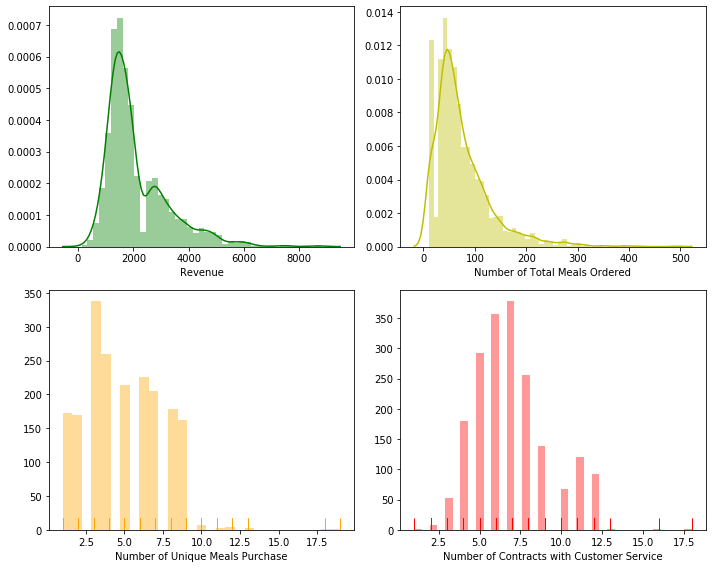

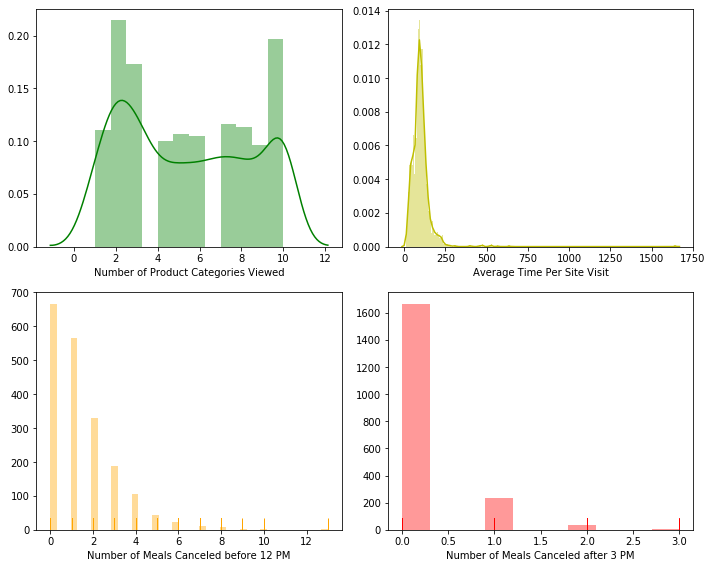

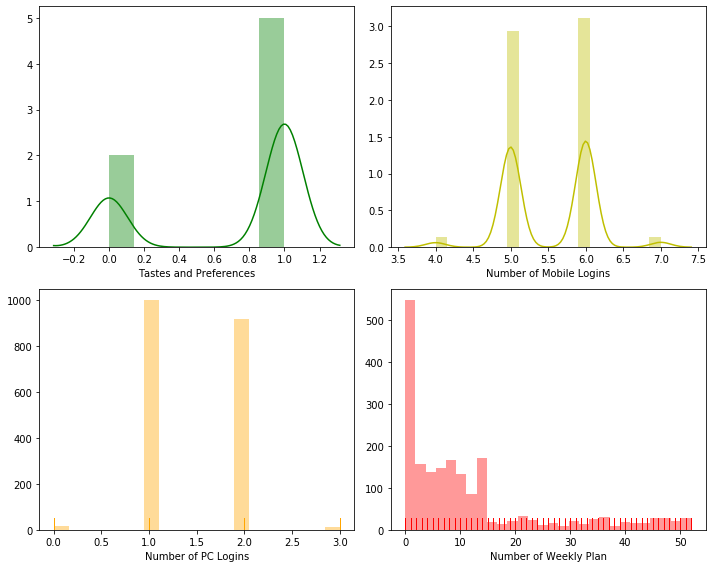

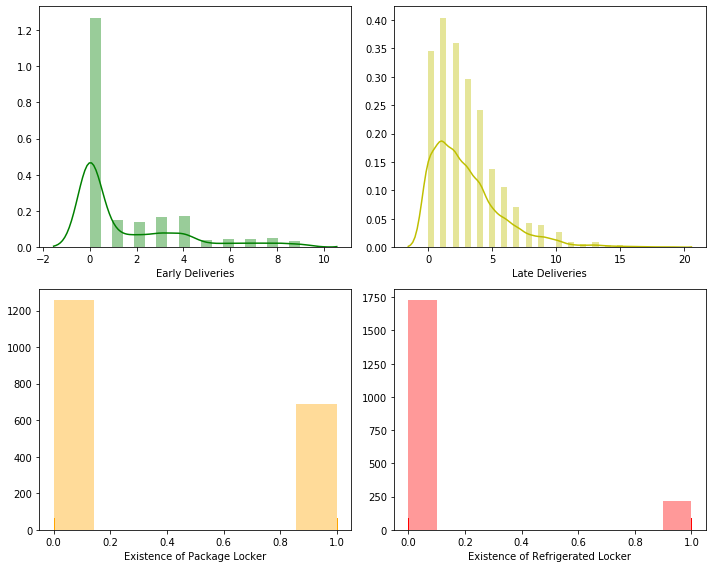

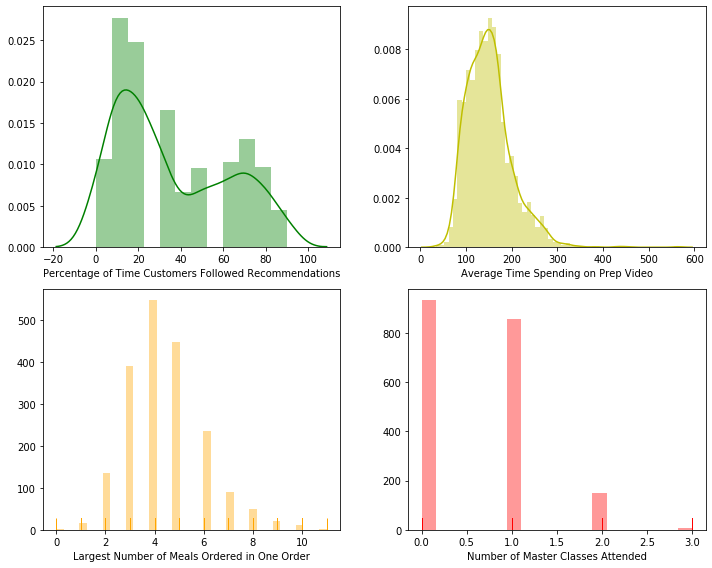

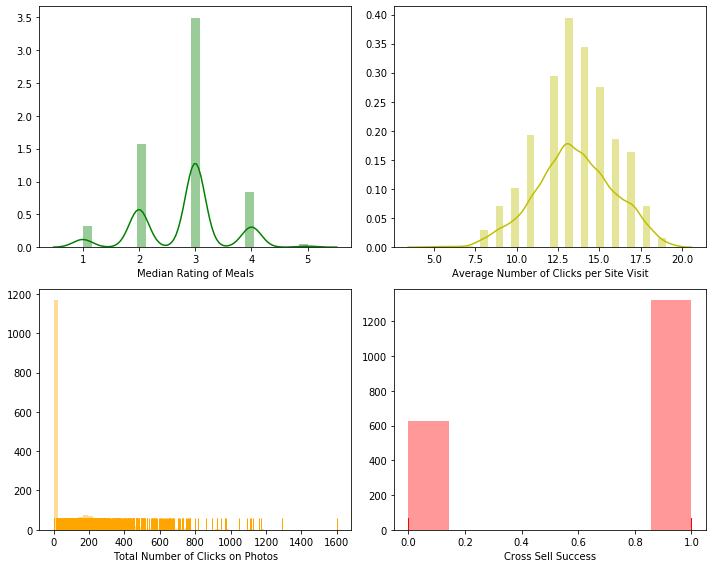

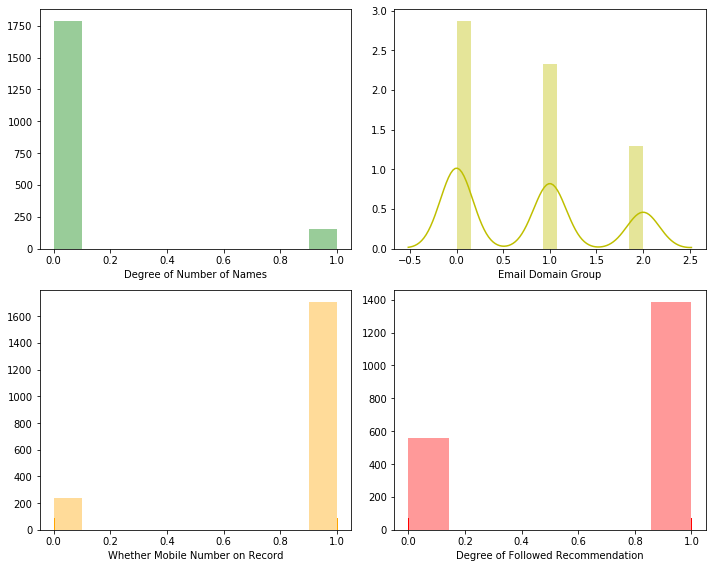

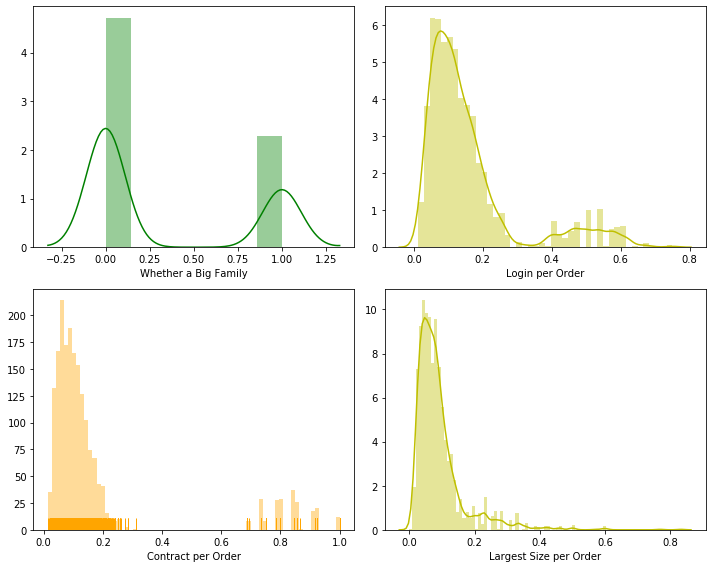

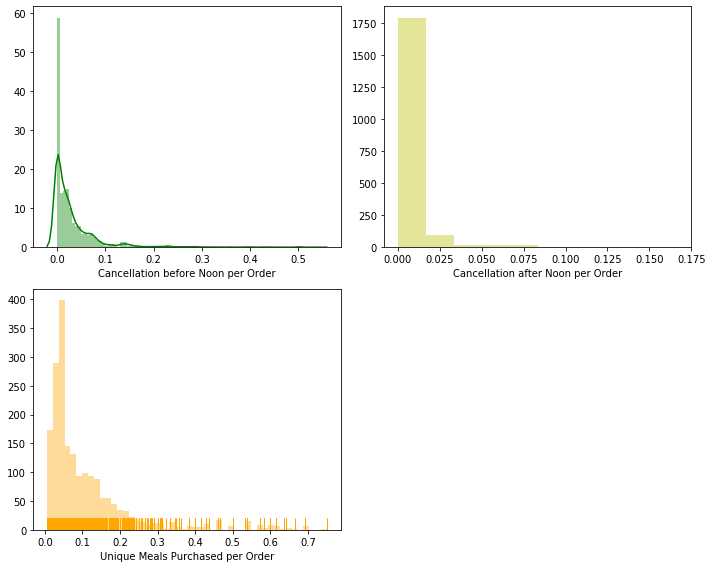

In [50]:
# Visual EDA (Histograms)

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['REVENUE'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('Revenue')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['TOTAL_MEALS_ORDERED'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Number of Total Meals Ordered')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['UNIQUE_MEALS_PURCH'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('Number of Unique Meals Purchase')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['CONTACTS_W_CUSTOMER_SERVICE'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('Number of Contracts with Customer Service')
plt.tight_layout()
plt.savefig('original_df Data Histograms 1 to 4.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['PRODUCT_CATEGORIES_VIEWED'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('Number of Product Categories Viewed')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['AVG_TIME_PER_SITE_VISIT'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Average Time Per Site Visit')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['CANCELLATIONS_BEFORE_NOON'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('Number of Meals Canceled before 12 PM')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['CANCELLATIONS_AFTER_NOON'],
             bins  = 10,
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('Number of Meals Canceled after 3 PM')

plt.tight_layout()
plt.savefig('original_df Data Histograms 5 to 8.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['TASTES_AND_PREFERENCES'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('Tastes and Preferences')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['MOBILE_LOGINS'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Number of Mobile Logins')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['PC_LOGINS'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('Number of PC Logins')

plt.subplot(2, 2, 4)
sns.distplot(original_df['WEEKLY_PLAN'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('Number of Weekly Plan')
plt.tight_layout()
plt.savefig('original_df Data Histograms 9 to 12.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['EARLY_DELIVERIES'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('Early Deliveries')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['LATE_DELIVERIES'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Late Deliveries')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['PACKAGE_LOCKER'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('Existence of Package Locker')

plt.subplot(2, 2, 4)
sns.distplot(original_df['REFRIGERATED_LOCKER'],
             bins  = 10,
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('Existence of Refrigerated Locker')
plt.tight_layout()
plt.savefig('original_df Data Histograms 13 to 16.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['FOLLOWED_RECOMMENDATIONS_PCT'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('Percentage of Time Customers Followed Recommendations')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['AVG_PREP_VID_TIME'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Average Time Spending on Prep Video')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['LARGEST_ORDER_SIZE'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('Largest Number of Meals Ordered in One Order')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['MASTER_CLASSES_ATTENDED'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('Number of Master Classes Attended')
plt.tight_layout()
plt.savefig('original_df Data Histograms 17 to 20.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['MEDIAN_MEAL_RATING'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('Median Rating of Meals')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['AVG_CLICKS_PER_VISIT'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Average Number of Clicks per Site Visit')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['TOTAL_PHOTOS_VIEWED'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('Total Number of Clicks on Photos')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['CROSS_SELL_SUCCESS'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('Cross Sell Success')
plt.tight_layout()
plt.savefig('original_df Data Histograms 21 to 24.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['degree_of_number_of_names'],
             bins  = 10,
             kde   = False,
             color = 'g')
plt.xlabel('Degree of Number of Names')

plt.subplot(2, 2, 2)
sns.distplot(original_df['DOMAIN_GROUP'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Email Domain Group')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['MOBILE_NUMBER'],
             bins  = 10,
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('Whether Mobile Number on Record')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['DEGREE_OF_FOLLOWED_RECOMMENDATION'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('Degree of Followed Recommendation')
plt.tight_layout()
plt.savefig('original_df Data Histograms 25 to 28.png')

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['BIG_FAMILY'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('Whether a Big Family')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['LOGIN_PER_ORDER'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Login per Order')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['CONTRACT_PER_ORDER'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('Contract per Order')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['LARGEST_SIZE_PER_ORDER'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Largest Size per Order')
plt.tight_layout()
plt.savefig('original_df Data Histograms 29-32.png')

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['CANCELLATION_BEFORE_NOON_PER_ORDER'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('Cancellation before Noon per Order')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['CANCELLATION_AFTER_NOON_PER_ORDER'],
             bins  = 10,
             kde = False,
             color = 'y')
plt.xlabel('Cancellation after Noon per Order')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['UNIQUE_MEALS_PURCH_PER_ORDER'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('Unique Meals Purchased per Order')
plt.tight_layout()
plt.savefig('original_df Data Histograms 33-34.png')


In [51]:
# setting outlier thresholds

REVENUE_hi = 6000                       
TOTAL_MEALS_ORDERED_hi = 300
UNIQUE_MEALS_PURCH_lo = 1 
UNIQUE_MEALS_PURCH_hi = 12.5          
CONTACTS_W_CUSTOMER_SERVICE_lo = 2.5
CONTACTS_W_CUSTOMER_SERVICE_hi = 12.5
PRODUCT_CATEGORIES_VIEWED_lo = 1
PRODUCT_CATEGORIES_VIEWED_hi = 10
AVG_TIME_PER_SITE_VISIT_hi = 250
CANCELLATIONS_BEFORE_NOON_lo = 0
CANCELLATIONS_BEFORE_NOON_hi = 8
CANCELLATIONS_AFTER_NOON_lo = 0
CANCELLATIONS_AFTER_NOON_hi = 3
TASTES_AND_PREFERENCES_lo = 0
TASTES_AND_PREFERENCES_hi = 1
MOBILE_LOGINS_lo = 5
MOBILE_LOGINS_hi = 6
PC_LOGINS_lo = 1
PC_LOGINS_hi = 2
WEEKLY_PLAN_lo = 0
WEEKLY_PLAN_hi = 15
EARLY_DELIVERIES_lo = 0
EARLY_DELIVERIES_hi = 8
LATE_DELIVERIES_lo = 0 
LATE_DELIVERIES_hi = 10
PACKAGE_LOCKER_lo = 0
PACKAGE_LOCKER_hi = 1
REFRIGERATED_LOCKER_lo = 0
REFRIGERATED_LOCKER_hi = 1
FOLLOWED_RECOMMENDATIONS_PCT_lo = 0
FOLLOWED_RECOMMENDATIONS_PCT_hi = 90
AVG_PREP_VID_TIME_lo = 50
AVG_PREP_VID_TIME_hi = 300
LARGEST_ORDER_SIZE_lo = 2
LARGEST_ORDER_SIZE_hi = 8
MASTER_CLASSES_ATTENDED_lo = 0
MASTER_CLASSES_ATTENDED_hi = 2
MEDIAN_MEAL_RATING_lo = 1
MEDIAN_MEAL_RATING_hi = 4
AVG_CLICKS_PER_VISIT_lo = 7.5
AVG_CLICKS_PER_VISIT_hi = 18
TOTAL_PHOTOS_VIEWED_hi = 700
degree_of_number_of_names_lo = 0
degree_of_number_of_names_hi = 1
DOMAIN_GROUP_lo = 0
DOMAIN_GROUP_hi = 2
MOBILE_NUMBER_lo = 0
MOBILE_NUMBER_hi = 1
DEGREE_OF_FOLLOWED_RECOMMENDATION_lo = 0
DEGREE_OF_FOLLOWED_RECOMMENDATION_hi = 1
BIG_FAMILY_lo = 0
BIG_FAMILY_hi = 1
LOGIN_PER_ORDER_hi = 0.6
CONTRACT_PER_ORDER_hi = 0.5
LARGEST_SIZE_PER_ORDER_hi = 0.2
CANCELLATION_BEFORE_NOON_PER_ORDER_hi = 0.1
CANCELLATION_AFTER_NOON_PER_ORDER_hi = 0.03
UNIQUE_MEALS_PURCH_PER_ORDER_hi = 0.2

CROSS_SELL_SUCCESS_lo = 0
CROSS_SELL_SUCCESS_hi = 1

# developing features (columns) for outliers

original_df['out_REVENUE'] = 0
condition_hi = original_df.loc[0:,'out_REVENUE'][original_df['REVENUE'] > REVENUE_hi]

original_df['out_REVENUE'].replace(to_replace = condition_hi,
                                   value      = 1,
                                   inplace    = True)

original_df['out_TOTAL_MEALS_ORDERED'] = 0
condition_hi = original_df.loc[0:,'out_TOTAL_MEALS_ORDERED'][original_df['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_hi]

original_df['out_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_hi,
                                               value      = 1,
                                               inplace    = True)

original_df['out_UNIQUE_MEALS_PURCH'] = 0
condition_hi = original_df.loc[0:,'out_UNIQUE_MEALS_PURCH'][original_df['UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURCH_hi]
condition_lo = original_df.loc[0:,'out_UNIQUE_MEALS_PURCH'][original_df['UNIQUE_MEALS_PURCH'] < UNIQUE_MEALS_PURCH_lo]

original_df['out_UNIQUE_MEALS_PURCH'].replace(to_replace = condition_hi,
                                              value      = 1,
                                              inplace    = True)
original_df['out_UNIQUE_MEALS_PURCH'].replace(to_replace = condition_lo,
                                              value      = 1,
                                              inplace    = True)

original_df['out_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition_hi = original_df.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_hi]
condition_lo = original_df.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] < CONTACTS_W_CUSTOMER_SERVICE_lo]

original_df['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_hi,
                                                       value      = 1,
                                                       inplace    = True)

original_df['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_lo,
                                                       value      = 1,
                                                       inplace    = True)

original_df['out_PRODUCT_CATEGORIES_VIEWED'] = 0
condition_hi = original_df.loc[0:,'out_PRODUCT_CATEGORIES_VIEWED'][original_df['PRODUCT_CATEGORIES_VIEWED'] > PRODUCT_CATEGORIES_VIEWED_hi]
condition_lo = original_df.loc[0:,'out_PRODUCT_CATEGORIES_VIEWED'][original_df['PRODUCT_CATEGORIES_VIEWED'] < PRODUCT_CATEGORIES_VIEWED_lo]

original_df['out_PRODUCT_CATEGORIES_VIEWED'].replace(to_replace = condition_hi,
                                                     value      = 1,
                                                     inplace    = True)

original_df['out_PRODUCT_CATEGORIES_VIEWED'].replace(to_replace = condition_lo,
                                                     value      = 1,
                                                     inplace    = True)

original_df['out_AVG_TIME_PER_SITE_VISIT'] = 0
condition_hi = original_df.loc[0:,'out_AVG_TIME_PER_SITE_VISIT'][original_df['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_hi]

original_df['out_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_hi,
                                                   value      = 1,
                                                   inplace    = True)

original_df['out_CANCELLATIONS_BEFORE_NOON'] = 0
condition_hi = original_df.loc[0:,'out_CANCELLATIONS_BEFORE_NOON'][original_df['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_hi]
condition_lo = original_df.loc[0:,'out_CANCELLATIONS_BEFORE_NOON'][original_df['CANCELLATIONS_BEFORE_NOON'] < CANCELLATIONS_BEFORE_NOON_lo]

original_df['out_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_hi,
                                                     value      = 1,
                                                     inplace    = True)
original_df['out_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_lo,
                                                     value      = 1,
                                                     inplace    = True)

original_df['out_CANCELLATIONS_AFTER_NOON'] = 0
condition_hi = original_df.loc[0:,'out_CANCELLATIONS_AFTER_NOON'][original_df['CANCELLATIONS_AFTER_NOON'] > CANCELLATIONS_AFTER_NOON_hi]
condition_lo = original_df.loc[0:,'out_CANCELLATIONS_AFTER_NOON'][original_df['CANCELLATIONS_AFTER_NOON'] < CANCELLATIONS_AFTER_NOON_lo]

original_df['out_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition_hi,
                                                    value      = 1,
                                                    inplace    = True)
original_df['out_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition_lo,
                                                    value      = 1,
                                                    inplace    = True)

original_df['out_TASTES_AND_PREFERENCES'] = 0
condition_hi = original_df.loc[0:,'out_TASTES_AND_PREFERENCES'][original_df['TASTES_AND_PREFERENCES'] > TASTES_AND_PREFERENCES_hi]
condition_lo = original_df.loc[0:,'out_TASTES_AND_PREFERENCES'][original_df['TASTES_AND_PREFERENCES'] < TASTES_AND_PREFERENCES_lo]

original_df['out_TASTES_AND_PREFERENCES'].replace(to_replace = condition_hi,
                                                  value      = 1,
                                                  inplace    = True)
original_df['out_TASTES_AND_PREFERENCES'].replace(to_replace = condition_lo,
                                                  value      = 1,
                                                  inplace    = True)

original_df['out_MOBILE_LOGINS'] = 0
condition_hi = original_df.loc[0:,'out_MOBILE_LOGINS'][original_df['MOBILE_LOGINS'] > MOBILE_LOGINS_hi]
condition_lo = original_df.loc[0:,'out_MOBILE_LOGINS'][original_df['MOBILE_LOGINS'] < MOBILE_LOGINS_lo]

original_df['out_MOBILE_LOGINS'].replace(to_replace = condition_hi,
                                         value      = 1,
                                         inplace    = True)
original_df['out_MOBILE_LOGINS'].replace(to_replace = condition_lo,
                                         value      = 1,
                                         inplace    = True)

original_df['out_PC_LOGINS'] = 0
condition_hi = original_df.loc[0:,'out_PC_LOGINS'][original_df['PC_LOGINS'] > PC_LOGINS_hi]
condition_lo = original_df.loc[0:,'out_PC_LOGINS'][original_df['PC_LOGINS'] < PC_LOGINS_lo]

original_df['out_PC_LOGINS'].replace(to_replace = condition_hi,
                                     value      = 1,
                                     inplace    = True)
original_df['out_PC_LOGINS'].replace(to_replace = condition_lo,
                                     value      = 1,
                                     inplace    = True)

original_df['out_WEEKLY_PLAN'] = 0
condition_hi = original_df.loc[0:,'out_WEEKLY_PLAN'][original_df['WEEKLY_PLAN'] > WEEKLY_PLAN_hi]
condition_lo = original_df.loc[0:,'out_WEEKLY_PLAN'][original_df['WEEKLY_PLAN'] < WEEKLY_PLAN_lo]

original_df['out_WEEKLY_PLAN'].replace(to_replace = condition_hi,
                                       value      = 1,
                                       inplace    = True)
original_df['out_WEEKLY_PLAN'].replace(to_replace = condition_lo,
                                       value      = 1,
                                       inplace    = True)

original_df['out_EARLY_DELIVERIES'] = 0
condition_hi = original_df.loc[0:,'out_EARLY_DELIVERIES'][original_df['EARLY_DELIVERIES'] > EARLY_DELIVERIES_hi]
condition_lo = original_df.loc[0:,'out_EARLY_DELIVERIES'][original_df['EARLY_DELIVERIES'] < EARLY_DELIVERIES_lo]

original_df['out_EARLY_DELIVERIES'].replace(to_replace = condition_hi,
                                            value      = 1,
                                            inplace    = True)
original_df['out_EARLY_DELIVERIES'].replace(to_replace = condition_lo,
                                            value      = 1,
                                            inplace    = True)

original_df['out_LATE_DELIVERIES'] = 0
condition_hi = original_df.loc[0:,'out_LATE_DELIVERIES'][original_df['LATE_DELIVERIES'] > LATE_DELIVERIES_hi]
condition_lo = original_df.loc[0:,'out_LATE_DELIVERIES'][original_df['LATE_DELIVERIES'] < LATE_DELIVERIES_lo]

original_df['out_LATE_DELIVERIES'].replace(to_replace = condition_hi,
                                           value      = 1,
                                           inplace    = True)
original_df['out_LATE_DELIVERIES'].replace(to_replace = condition_lo,
                                           value      = 1,
                                           inplace    = True)

original_df['out_PACKAGE_LOCKER'] = 0
condition_hi = original_df.loc[0:,'out_PACKAGE_LOCKER'][original_df['PACKAGE_LOCKER'] > PACKAGE_LOCKER_hi]
condition_lo = original_df.loc[0:,'out_PACKAGE_LOCKER'][original_df['PACKAGE_LOCKER'] < PACKAGE_LOCKER_lo]

original_df['out_PACKAGE_LOCKER'].replace(to_replace = condition_hi,
                                          value      = 1,
                                          inplace    = True)
original_df['out_PACKAGE_LOCKER'].replace(to_replace = condition_lo,
                                          value      = 1,
                                          inplace    = True)

original_df['out_REFRIGERATED_LOCKER'] = 0
condition_hi = original_df.loc[0:,'out_REFRIGERATED_LOCKER'][original_df['REFRIGERATED_LOCKER'] > REFRIGERATED_LOCKER_hi]
condition_lo = original_df.loc[0:,'out_REFRIGERATED_LOCKER'][original_df['REFRIGERATED_LOCKER'] < REFRIGERATED_LOCKER_lo]

original_df['out_REFRIGERATED_LOCKER'].replace(to_replace = condition_hi,
                                               value      = 1,
                                               inplace    = True)
original_df['out_REFRIGERATED_LOCKER'].replace(to_replace = condition_lo,
                                               value      = 1,
                                               inplace    = True)

original_df['out_FOLLOWED_RECOMMENDATIONS_PCT'] = 0
condition_hi = original_df.loc[0:,'out_FOLLOWED_RECOMMENDATIONS_PCT'][original_df['FOLLOWED_RECOMMENDATIONS_PCT'] > FOLLOWED_RECOMMENDATIONS_PCT_hi]
condition_lo = original_df.loc[0:,'out_FOLLOWED_RECOMMENDATIONS_PCT'][original_df['FOLLOWED_RECOMMENDATIONS_PCT'] < FOLLOWED_RECOMMENDATIONS_PCT_lo]

original_df['out_FOLLOWED_RECOMMENDATIONS_PCT'].replace(to_replace = condition_hi,
                                                        value      = 1,
                                                        inplace    = True)
original_df['out_FOLLOWED_RECOMMENDATIONS_PCT'].replace(to_replace = condition_lo,
                                                        value      = 1,
                                                        inplace    = True)

original_df['out_AVG_PREP_VID_TIME'] = 0
condition_hi = original_df.loc[0:,'out_AVG_PREP_VID_TIME'][original_df['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_hi]
condition_lo = original_df.loc[0:,'out_AVG_PREP_VID_TIME'][original_df['AVG_PREP_VID_TIME'] < AVG_PREP_VID_TIME_lo]

original_df['out_REFRIGERATED_LOCKER'].replace(to_replace = condition_hi,
                                               value      = 1,
                                               inplace    = True)
original_df['out_REFRIGERATED_LOCKER'].replace(to_replace = condition_lo,
                                               value      = 1,
                                               inplace    = True)

original_df['out_LARGEST_ORDER_SIZE'] = 0
condition_hi = original_df.loc[0:,'out_LARGEST_ORDER_SIZE'][original_df['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_hi]
condition_lo = original_df.loc[0:,'out_LARGEST_ORDER_SIZE'][original_df['LARGEST_ORDER_SIZE'] < LARGEST_ORDER_SIZE_lo]

original_df['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition_hi,
                                              value      = 1,
                                              inplace    = True)
original_df['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition_lo,
                                              value      = 1,
                                              inplace    = True)

original_df['out_MASTER_CLASSES_ATTENDED'] = 0
condition_hi = original_df.loc[0:,'out_MASTER_CLASSES_ATTENDED'][original_df['MASTER_CLASSES_ATTENDED'] > MASTER_CLASSES_ATTENDED_hi]
condition_lo = original_df.loc[0:,'out_MASTER_CLASSES_ATTENDED'][original_df['MASTER_CLASSES_ATTENDED'] < MASTER_CLASSES_ATTENDED_lo]

original_df['out_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition_hi,
                                                   value      = 1,
                                                   inplace    = True)
original_df['out_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition_lo,
                                                   value      = 1,
                                                   inplace    = True)

original_df['out_MEDIAN_MEAL_RATING'] = 0
condition_hi = original_df.loc[0:,'out_MEDIAN_MEAL_RATING'][original_df['MEDIAN_MEAL_RATING'] > MEDIAN_MEAL_RATING_hi]
condition_lo = original_df.loc[0:,'out_MEDIAN_MEAL_RATING'][original_df['MEDIAN_MEAL_RATING'] < MEDIAN_MEAL_RATING_lo]

original_df['out_MEDIAN_MEAL_RATING'].replace(to_replace = condition_hi,
                                              value      = 1,
                                              inplace    = True)
original_df['out_MEDIAN_MEAL_RATING'].replace(to_replace = condition_lo,
                                              value      = 1,
                                              inplace    = True)

original_df['out_AVG_CLICKS_PER_VISIT'] = 0
condition_hi = original_df.loc[0:,'out_AVG_CLICKS_PER_VISIT'][original_df['AVG_CLICKS_PER_VISIT'] > AVG_CLICKS_PER_VISIT_hi]
condition_lo = original_df.loc[0:,'out_AVG_CLICKS_PER_VISIT'][original_df['AVG_CLICKS_PER_VISIT'] < AVG_CLICKS_PER_VISIT_lo]

original_df['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_hi,
                                                value      = 1,
                                                inplace    = True)
original_df['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_lo,
                                                value      = 1,
                                                inplace    = True)

original_df['out_TOTAL_PHOTOS_VIEWED'] = 0
condition_hi = original_df.loc[0:,'out_TOTAL_PHOTOS_VIEWED'][original_df['TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_VIEWED_hi]

original_df['out_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_hi,
                                               value      = 1,
                                               inplace    = True)

original_df['out_degree_of_number_of_names'] = 0
condition_hi = original_df.loc[0:,'out_degree_of_number_of_names'][original_df['degree_of_number_of_names'] > degree_of_number_of_names_hi]
condition_lo = original_df.loc[0:,'out_degree_of_number_of_names'][original_df['degree_of_number_of_names'] < degree_of_number_of_names_lo]

original_df['out_degree_of_number_of_names'].replace(to_replace = condition_hi,
                                                     value      = 1,
                                                     inplace    = True)
original_df['out_degree_of_number_of_names'].replace(to_replace = condition_lo,
                                                     value      = 1,
                                                     inplace    = True)

original_df['out_DOMAIN_GROUP'] = 0
condition_hi = original_df.loc[0:,'out_DOMAIN_GROUP'][original_df['DOMAIN_GROUP'] > DOMAIN_GROUP_hi]
condition_lo = original_df.loc[0:,'out_DOMAIN_GROUP'][original_df['DOMAIN_GROUP'] < DOMAIN_GROUP_lo]

original_df['out_DOMAIN_GROUP'].replace(to_replace = condition_hi,
                                        value      = 1,
                                        inplace    = True)
original_df['out_DOMAIN_GROUP'].replace(to_replace = condition_lo,
                                        value      = 1,
                                        inplace    = True)

original_df['out_CROSS_SELL_SUCCESS'] = 0
condition_hi = original_df.loc[0:,'out_CROSS_SELL_SUCCESS'][original_df['CROSS_SELL_SUCCESS'] > CROSS_SELL_SUCCESS_hi]
condition_lo = original_df.loc[0:,'out_CROSS_SELL_SUCCESS'][original_df['CROSS_SELL_SUCCESS'] < CROSS_SELL_SUCCESS_lo]

original_df['out_CROSS_SELL_SUCCESS'].replace(to_replace = condition_hi,
                                        value      = 1,
                                        inplace    = True)
original_df['out_CROSS_SELL_SUCCESS'].replace(to_replace = condition_lo,
                                        value      = 1,
                                        inplace    = True)

original_df['out_MOBILE_NUMBER'] = 0
condition_hi = original_df.loc[0:,'out_MOBILE_NUMBER'][original_df['MOBILE_NUMBER'] > MOBILE_NUMBER_hi]
condition_lo = original_df.loc[0:,'out_MOBILE_NUMBER'][original_df['MOBILE_NUMBER'] < MOBILE_NUMBER_lo]

original_df['out_MOBILE_NUMBER'].replace(to_replace = condition_hi,
                                         value      = 1,
                                         inplace    = True)
original_df['out_MOBILE_NUMBER'].replace(to_replace = condition_lo,
                                         value      = 1,
                                         inplace    = True)

original_df['out_DEGREE_OF_FOLLOWED_RECOMMENDATION'] = 0
condition_hi = original_df.loc[0:,'out_DEGREE_OF_FOLLOWED_RECOMMENDATION'][original_df['DEGREE_OF_FOLLOWED_RECOMMENDATION'] > DEGREE_OF_FOLLOWED_RECOMMENDATION_hi]
condition_lo = original_df.loc[0:,'out_DEGREE_OF_FOLLOWED_RECOMMENDATION'][original_df['DEGREE_OF_FOLLOWED_RECOMMENDATION'] < DEGREE_OF_FOLLOWED_RECOMMENDATION_lo]

original_df['out_DEGREE_OF_FOLLOWED_RECOMMENDATION'].replace(to_replace = condition_hi,
                                                             value      = 1,
                                                             inplace    = True)
original_df['out_DEGREE_OF_FOLLOWED_RECOMMENDATION'].replace(to_replace = condition_lo,
                                                             value      = 1,
                                                             inplace    = True)

original_df['out_BIG_FAMILY'] = 0
condition_hi = original_df.loc[0:,'out_BIG_FAMILY'][original_df['BIG_FAMILY'] > BIG_FAMILY_hi]
condition_lo = original_df.loc[0:,'out_BIG_FAMILY'][original_df['BIG_FAMILY'] < BIG_FAMILY_lo]

original_df['out_BIG_FAMILY'].replace(to_replace = condition_hi,
                                      value      = 1,
                                      inplace    = True)
original_df['out_BIG_FAMILY'].replace(to_replace = condition_lo,
                                      value      = 1,
                                      inplace    = True)

original_df['out_LOGIN_PER_ORDER'] = 0
condition_hi = original_df.loc[0:,'out_LOGIN_PER_ORDER'][original_df['LOGIN_PER_ORDER'] > LOGIN_PER_ORDER_hi]

original_df['out_LOGIN_PER_ORDER'].replace(to_replace = condition_hi,
                                           value      = 1,
                                           inplace    = True)

original_df['out_CONTRACT_PER_ORDER'] = 0
condition_hi = original_df.loc[0:,'out_CONTRACT_PER_ORDER'][original_df['CONTRACT_PER_ORDER'] > CONTRACT_PER_ORDER_hi]

original_df['out_CONTRACT_PER_ORDER'].replace(to_replace = condition_hi,
                                              value      = 1,
                                              inplace    = True)

original_df['out_LARGEST_SIZE_PER_ORDER'] = 0
condition_hi = original_df.loc[0:,'out_LARGEST_SIZE_PER_ORDER'][original_df['LARGEST_SIZE_PER_ORDER'] > LARGEST_SIZE_PER_ORDER_hi]

original_df['out_LARGEST_SIZE_PER_ORDER'].replace(to_replace = condition_hi,
                                              value      = 1,
                                              inplace    = True)

original_df['out_CANCELLATION_BEFORE_NOON_PER_ORDER'] = 0
condition_hi = original_df.loc[0:,'out_CANCELLATION_BEFORE_NOON_PER_ORDER'][original_df['CANCELLATION_BEFORE_NOON_PER_ORDER'] > CANCELLATION_BEFORE_NOON_PER_ORDER_hi]

original_df['out_CANCELLATION_BEFORE_NOON_PER_ORDER'].replace(to_replace = condition_hi,
                                                              value      = 1,
                                                              inplace    = True)

original_df['out_CANCELLATION_AFTER_NOON_PER_ORDER'] = 0
condition_hi = original_df.loc[0:,'out_CANCELLATION_AFTER_NOON_PER_ORDER'][original_df['CANCELLATION_AFTER_NOON_PER_ORDER'] > CANCELLATION_AFTER_NOON_PER_ORDER_hi]

original_df['out_CANCELLATION_AFTER_NOON_PER_ORDER'].replace(to_replace = condition_hi,
                                                             value      = 1,
                                                             inplace    = True)

original_df['out_UNIQUE_MEALS_PURCH_PER_ORDER'] = 0
condition_hi = original_df.loc[0:,'out_UNIQUE_MEALS_PURCH_PER_ORDER'][original_df['UNIQUE_MEALS_PURCH_PER_ORDER'] > UNIQUE_MEALS_PURCH_PER_ORDER_hi]

original_df['out_UNIQUE_MEALS_PURCH_PER_ORDER'].replace(to_replace = condition_hi,
                                                        value      = 1,
                                                        inplace    = True)


In [52]:
# saving the file
original_df.to_excel('chef_feature_rich.xlsx',
                    index = False)

<font size="3"><b>Part 3: Classification Modeling</b>

<b>Logistic Regression</b>

- <b>Correlation</b><br>Now that we've finished developing features, we are ready to start the model building process. As a first step, let's see how the explanatory variables correlate to the response variable.

In [53]:
df_corr = original_df.corr()

print(df_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False).head(20))
print(df_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = True).head(10))

CROSS_SELL_SUCCESS                        1.000000
FOLLOWED_RECOMMENDATIONS_PCT              0.464387
DEGREE_OF_FOLLOWED_RECOMMENDATION         0.198143
CANCELLATIONS_BEFORE_NOON                 0.163442
number_of_names                           0.156373
CANCELLATION_BEFORE_NOON_PER_ORDER        0.112359
MOBILE_NUMBER                             0.102657
BIG_FAMILY                                0.086718
TASTES_AND_PREFERENCES                    0.081438
REFRIGERATED_LOCKER                       0.068321
out_CANCELLATION_BEFORE_NOON_PER_ORDER    0.068262
MOBILE_LOGINS                             0.044462
PACKAGE_LOCKER                            0.043534
MASTER_CLASSES_ATTENDED                   0.037213
CONTACTS_W_CUSTOMER_SERVICE               0.036541
AVG_PREP_VID_TIME                         0.032115
MEDIAN_MEAL_RATING                        0.031798
out_MEDIAN_MEAL_RATING                    0.029388
out_LOGIN_PER_ORDER                       0.025137
LARGEST_ORDER_SIZE             

- <b>Stratification</b><br>When working with classification problems, it is vitally important to understand if the balance of the response variable is balanced. In other words, what is the proportion of people that subscribed cross-selling service versus those that did not subscribe? Encountering a response variable is too imbalanced can cause issues in machine learning modeling.

In [54]:
# declaring explanatory variables
original_df_data = original_df.drop(labels = ['CROSS_SELL_SUCCESS', 'out_CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 
                                              'FIRST_NAME', 'FAMILY_NAME', 'EMAIL_DOMAIN', 'm_FAMILY_NAME'],
                                    axis = 1) # drop irrelevant variables

# declaring response variable
original_df_response = original_df.loc[:, 'CROSS_SELL_SUCCESS']

Here, I dropped variables which correlation with "CROSS_SELL_SUCCESS" are lower than the absolute value of 0.02. "number_of_names" has a relatively strong correlation with "CROSS_SELL_SUCCESS", and can replace "NAME", "FIRST_NAME" and "FAMILY_NAME". The same with "DOMAIN_GROUP, which can replace "EMAIL", and "EMAIL_DOMAIN".

Build a logistic regression model in statsmodels using the explanatory variable most highly correlated with the response variable. As "DEGREE_OF_FOLLOWED_RECOMMENDATION" is a binary variable, just like "CROSS_SELL_SUCCESS", it's impossible to do logistic regression on CROSS_SELL_SUCCESS ~ DEGREE_OF_FOLLOWED_RECOMMENDATION. Thus, we do it by using "FOLLOWED_RECOMMENDATIONS_PCT" instead.

In [55]:
# preparing training and testing sets
X_train, X_test, y_train, y_test = train_test_split(original_df_data,
                                                    original_df_response,
                                                    test_size = 0.25,
                                                    random_state = 222)

# merging X_train and y_train so that they can be used in statsmodels
original_df_train = pd.concat([X_train, y_train], axis = 1)

In [56]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula = "CROSS_SELL_SUCCESS ~ FOLLOWED_RECOMMENDATIONS_PCT",
                           data = original_df_train)

# FITTING the model object
results_logistic = logistic_small.fit()

# checking the results SUMMARY
results_logistic.summary()

Optimization terminated successfully.
         Current function value: 0.491443
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1457
Method:                           MLE   Df Model:                            1
Date:                Tue, 17 Mar 2020   Pseudo R-squ.:                  0.2155
Time:                        13:41:56   Log-Likelihood:                -717.01
converged:                       True   LL-Null:                       -913.94
Covariance Type:            nonrobust   LLR p-value:                 1.204e-87
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.8537      0.105     -8.168      0.000      -1.059      -0.649
FOLLOWED_RECOMMENDATIONS_PCT     0.0566      0.004     15.379      0.000       0.049       0.064
================================================================================================
"""

In [57]:
import math
math.exp(0.0566)-1

0.05823243275251544

When the percentage of customer following meals recommendation goes up by 1%, the odds for this customer subscribing the cross-selling service will increase by 5.8%. Besides, p-value of "FOLLOWED_RECOMMENDATIONS_PCT" is below 0.05, so it's statistically significant.

Build a logistic regression model in statsmodels using all of the explanatory variables. Use the loop below for efficiency and correct any errors that occur after the copy/paste.

In [58]:
for val in original_df_data:
    print(f"{val} +")

REVENUE +
TOTAL_MEALS_ORDERED +
UNIQUE_MEALS_PURCH +
CONTACTS_W_CUSTOMER_SERVICE +
PRODUCT_CATEGORIES_VIEWED +
AVG_TIME_PER_SITE_VISIT +
MOBILE_NUMBER +
CANCELLATIONS_BEFORE_NOON +
CANCELLATIONS_AFTER_NOON +
TASTES_AND_PREFERENCES +
MOBILE_LOGINS +
PC_LOGINS +
WEEKLY_PLAN +
EARLY_DELIVERIES +
LATE_DELIVERIES +
PACKAGE_LOCKER +
REFRIGERATED_LOCKER +
FOLLOWED_RECOMMENDATIONS_PCT +
AVG_PREP_VID_TIME +
LARGEST_ORDER_SIZE +
MASTER_CLASSES_ATTENDED +
MEDIAN_MEAL_RATING +
AVG_CLICKS_PER_VISIT +
TOTAL_PHOTOS_VIEWED +
number_of_names +
degree_of_number_of_names +
BIG_FAMILY +
DOMAIN_GROUP +
DEGREE_OF_FOLLOWED_RECOMMENDATION +
LOGIN_PER_ORDER +
CONTRACT_PER_ORDER +
LARGEST_SIZE_PER_ORDER +
UNIQUE_MEALS_PURCH_PER_ORDER +
CANCELLATION_BEFORE_NOON_PER_ORDER +
CANCELLATION_AFTER_NOON_PER_ORDER +
out_REVENUE +
out_TOTAL_MEALS_ORDERED +
out_UNIQUE_MEALS_PURCH +
out_CONTACTS_W_CUSTOMER_SERVICE +
out_PRODUCT_CATEGORIES_VIEWED +
out_AVG_TIME_PER_SITE_VISIT +
out_CANCELLATIONS_BEFORE_NOON +
out_CANCELLATI

Every time dealing with categorical data, drop one of the dummy variables out, because 0 and 1 always have the perfect negative correlation.

In [75]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ CROSS_SELL_SUCCESS ~
                                        REVENUE +
                                        TOTAL_MEALS_ORDERED +
                                        UNIQUE_MEALS_PURCH +
                                        CONTACTS_W_CUSTOMER_SERVICE +
                                        PRODUCT_CATEGORIES_VIEWED +
                                        AVG_TIME_PER_SITE_VISIT +
                                        MOBILE_NUMBER +
                                        CANCELLATIONS_BEFORE_NOON +
                                        CANCELLATIONS_AFTER_NOON +
                                        TASTES_AND_PREFERENCES +
                                        MOBILE_LOGINS +
                                        PC_LOGINS +
                                        WEEKLY_PLAN +
                                        EARLY_DELIVERIES +
                                        LATE_DELIVERIES +
                                        PACKAGE_LOCKER +
                                        REFRIGERATED_LOCKER +
                                        FOLLOWED_RECOMMENDATIONS_PCT +
                                        AVG_PREP_VID_TIME +
                                        LARGEST_ORDER_SIZE +
                                        MASTER_CLASSES_ATTENDED +
                                        MEDIAN_MEAL_RATING +
                                        AVG_CLICKS_PER_VISIT +
                                        TOTAL_PHOTOS_VIEWED +
                                        number_of_names +
                                        degree_of_number_of_names +
                                        BIG_FAMILY +
                                        DOMAIN_GROUP +
                                        DEGREE_OF_FOLLOWED_RECOMMENDATION +
                                        LOGIN_PER_ORDER +
                                        CONTRACT_PER_ORDER +
                                        LARGEST_SIZE_PER_ORDER +
                                        UNIQUE_MEALS_PURCH_PER_ORDER +
                                        CANCELLATION_BEFORE_NOON_PER_ORDER +
                                        CANCELLATION_AFTER_NOON_PER_ORDER +
                                        out_REVENUE +
                                        out_TOTAL_MEALS_ORDERED +
                                        out_UNIQUE_MEALS_PURCH +
                                        out_CONTACTS_W_CUSTOMER_SERVICE +
                                        out_AVG_CLICKS_PER_VISIT +
                                        out_AVG_TIME_PER_SITE_VISIT +
                                        out_MASTER_CLASSES_ATTENDED +
                                        out_MOBILE_LOGINS +
                                        out_LARGEST_ORDER_SIZE +
                                        out_MOBILE_LOGINS +
                                        out_PC_LOGINS +
                                        out_WEEKLY_PLAN +
                                        out_MEDIAN_MEAL_RATING +
                                        out_REFRIGERATED_LOCKER +
                                        out_EARLY_DELIVERIES +
                                        out_LATE_DELIVERIES +
                                        out_REFRIGERATED_LOCKER +
                                        out_TOTAL_PHOTOS_VIEWED +
                                        out_CANCELLATIONS_BEFORE_NOON +
                                        out_LOGIN_PER_ORDER +
                                        out_CONTRACT_PER_ORDER +
                                        out_LARGEST_SIZE_PER_ORDER +
                                        out_CANCELLATION_BEFORE_NOON_PER_ORDER +
                                        out_CANCELLATION_AFTER_NOON_PER_ORDER +
                                        out_UNIQUE_MEALS_PURCH_PER_ORDER""",
                                        data = original_df_train)

# fitting the model object
results_full = logistic_full.fit()

# checking the results SUMMARY
results_full.summary()

Optimization terminated successfully.
         Current function value: 0.380132
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1400
Method:                           MLE   Df Model:                           58
Date:                Tue, 17 Mar 2020   Pseudo R-squ.:                  0.3932
Time:                        13:50:42   Log-Likelihood:                -554.61
converged:                       True   LL-Null:                       -913.94
Covariance Type:            nonrobust   LLR p-value:                1.127e-114
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -0.4704      1.750     -0.269      0.788      -3.900       2.960
REVENUE                                 -2.76e-05      0.000     -0.207      0.836      -0.000       0.000
TOTAL_MEALS_ORDERED                       -0.0046      0.003     -1.410      0.159      -0.011       0.002
UNIQUE_MEALS_PURCH                         0.1464      0.054      2.694      0.007       0.040       0.253
CONTACTS_W_CUSTOMER_SERVICE                0.0123      0.093      0.132      0.895      -0.171       0.195
PRODUCT_CATEGORIES_VIEWED                  0.0096      0.025      0.380      0.704      -0.040       0.059
AVG_TIME_PER_SITE_VISIT                    0.0033      0.002      1.641      0.101      -0.001       0.007
MOBILE_NUMBER                              0.9588      0.232      4.128      0.000       0.504       1.414
CANCELLATIONS_BEFORE_NOON                  0.0866      0.100      0.865      0.387      -0.110       0.283
CANCELLATIONS_AFTER_NOON                  -0.2268      0.288     -0.786      0.432      -0.792       0.339
TASTES_AND_PREFERENCES                     0.5660      0.166      3.401      0.001       0.240       0.892
MOBILE_LOGINS                              0.1434      0.154      0.934      0.350      -0.157       0.444
PC_LOGINS                                 -0.2129      0.168     -1.270      0.204      -0.541       0.116
WEEKLY_PLAN                               -0.0253      0.012     -2.180      0.029      -0.048      -0.003
EARLY_DELIVERIES                           0.0182      0.037      0.499      0.618      -0.053       0.090
LATE_DELIVERIES                            0.0220      0.032      0.678      0.498      -0.042       0.085
PACKAGE_LOCKER                             0.0792      0.180      0.440      0.660      -0.273       0.432
REFRIGERATED_LOCKER                        0.1742      0.285      0.611      0.541      -0.385       0.733
FOLLOWED_RECOMMENDATIONS_PCT               0.1083      0.009     12.638      0.000       0.091       0.125
AVG_PREP_VID_TIME                          0.0037      0.004      1.032      0.302      -0.003       0.011
LARGEST_ORDER_SIZE                        -0.1644      0.116     -1.413      0.158      -0.392       0.064
MASTER_CLASSES_ATTENDED                    0.1094      0.142      0.771      0.440      -0.169       0.388
MEDIAN_MEAL_RATING                        -0.6030      0.237     -2.548      0.011      -1.067      -0.139
AVG_CLICKS_PER_VISIT                      -0.1436      0.066     -2.185      0.029      -0.272      -0.015
TOTAL_PHOTOS_VIEWED                     7.548e-05      0.001      0.125      0.900      -0.001       0.001
number_of_names                            1.0852      0.165      6.589      0.000       0.762       1.408
degree_of_number_of_names                 -1.9717      0.441     -4.471      0.000      -2.836      -1.107
BIG_FAMILY                     

Among of these remaining variables, it looks as if the only significant explanatory variable is "DEGREE_OF_FOLLOWED_RECOMMENDATION". This variable is so powerful that it is drowning out the effects of all other explanatory variables (no pun intended). Such findings can lead to incredible insight, stemming from the intuitive finding that cross-selling success depends on how large the degree of people following the meal recommendation is.

In order to examine the Halfway There success further, let's adjust the event horizon of our prediction by using "DEGREE_OF_FOLLOWED_RECOMMENDATION" as the response variable as this appears to be the key to the success of cross-selling promotion. Run the following code and analyze its results.

As "DEGREE_OF_FOLLOWED_RECOMMENDATION" is derived from "FOLLOWED_RECOMMENDATIONS_PCT", drop the "FOLLOWED_RECOMMENDATIONS_PCT" first.

In [79]:
# instantiating a logistic regression model object
logit_full = smf.logit(formula = """ DEGREE_OF_FOLLOWED_RECOMMENDATION ~
                                     REVENUE +
                                     TOTAL_MEALS_ORDERED +
                                     UNIQUE_MEALS_PURCH +
                                     CONTACTS_W_CUSTOMER_SERVICE +
                                     PRODUCT_CATEGORIES_VIEWED +
                                     AVG_TIME_PER_SITE_VISIT +
                                     MOBILE_NUMBER +
                                     CANCELLATIONS_BEFORE_NOON +
                                     CANCELLATIONS_AFTER_NOON +
                                     TASTES_AND_PREFERENCES +
                                     MOBILE_LOGINS +
                                     PC_LOGINS +
                                     WEEKLY_PLAN +
                                     EARLY_DELIVERIES +
                                     LATE_DELIVERIES +
                                     PACKAGE_LOCKER +
                                     REFRIGERATED_LOCKER +
                                     AVG_PREP_VID_TIME +
                                     LARGEST_ORDER_SIZE +
                                     MASTER_CLASSES_ATTENDED +
                                     MEDIAN_MEAL_RATING +
                                     AVG_CLICKS_PER_VISIT +
                                     TOTAL_PHOTOS_VIEWED +
                                     number_of_names +
                                     degree_of_number_of_names +
                                     BIG_FAMILY +
                                     DOMAIN_GROUP +
                                     LOGIN_PER_ORDER +
                                     CONTRACT_PER_ORDER +
                                     LARGEST_SIZE_PER_ORDER +
                                     UNIQUE_MEALS_PURCH_PER_ORDER +
                                     CANCELLATION_BEFORE_NOON_PER_ORDER +
                                     CANCELLATION_AFTER_NOON_PER_ORDER +
                                     out_REVENUE +
                                     out_TOTAL_MEALS_ORDERED +
                                     out_UNIQUE_MEALS_PURCH +
                                     out_CONTACTS_W_CUSTOMER_SERVICE +
                                     out_AVG_CLICKS_PER_VISIT +
                                     out_AVG_TIME_PER_SITE_VISIT +
                                     out_MASTER_CLASSES_ATTENDED +
                                     out_MOBILE_LOGINS +
                                     out_LARGEST_ORDER_SIZE +
                                     out_MOBILE_LOGINS +
                                     out_PC_LOGINS +
                                     out_WEEKLY_PLAN +
                                     out_MEDIAN_MEAL_RATING +
                                     out_REFRIGERATED_LOCKER +
                                     out_EARLY_DELIVERIES +
                                     out_LATE_DELIVERIES +
                                     out_REFRIGERATED_LOCKER +
                                     out_TOTAL_PHOTOS_VIEWED +
                                     out_CANCELLATIONS_BEFORE_NOON +
                                     out_LOGIN_PER_ORDER +
                                     out_CONTRACT_PER_ORDER +
                                     out_LARGEST_SIZE_PER_ORDER +
                                     out_CANCELLATION_BEFORE_NOON_PER_ORDER +
                                     out_CANCELLATION_AFTER_NOON_PER_ORDER +
                                     out_UNIQUE_MEALS_PURCH_PER_ORDER""",
                                     data = original_df_train)


# fitting the model object
logit_full = logit_full.fit()


# checking the results SUMMARY
logit_full.summary()

         Current function value: 0.566644
         Iterations: 35


C:\Users\isabe\New Folder\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   Logit Regression Results                                  
=============================================================================================
Dep. Variable:     DEGREE_OF_FOLLOWED_RECOMMENDATION   No. Observations:                 1459
Model:                                         Logit   Df Residuals:                     1402
Method:                                          MLE   Df Model:                           56
Date:                               Tue, 17 Mar 2020   Pseudo R-squ.:                 0.05201
Time:                                       13:57:45   Log-Likelihood:                -826.73
converged:                                     False   LL-Null:                       -872.09
Covariance Type:                           nonrobust   LLR p-value:                  0.002289
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  2.0840      1.383      1.507      0.132      -0.626       4.794
REVENUE                                 4.141e-05      0.000      0.402      0.688      -0.000       0.000
TOTAL_MEALS_ORDERED                       -0.0039      0.003     -1.515      0.130      -0.009       0.001
UNIQUE_MEALS_PURCH                         0.0854      0.043      2.009      0.045       0.002       0.169
CONTACTS_W_CUSTOMER_SERVICE               -0.0063      0.071     -0.088      0.930      -0.146       0.134
PRODUCT_CATEGORIES_VIEWED                 -0.0069      0.020     -0.340      0.733      -0.046       0.033
AVG_TIME_PER_SITE_VISIT                   -0.0006      0.002     -0.362      0.717      -0.004       0.003
MOBILE_NUMBER                             -0.0420      0.189     -0.222      0.824      -0.412       0.328
CANCELLATIONS_BEFORE_NOON                  0.1588      0.075      2.129      0.033       0.013       0.305
CANCELLATIONS_AFTER_NOON                  -0.1731      0.233     -0.743      0.457      -0.630       0.283
TASTES_AND_PREFERENCES                    -0.0775      0.134     -0.577      0.564      -0.341       0.186
MOBILE_LOGINS                             -0.0824      0.123     -0.670      0.503      -0.324       0.159
PC_LOGINS                                  0.2308      0.134      1.727      0.084      -0.031       0.493
WEEKLY_PLAN                                0.0058      0.009      0.636      0.525      -0.012       0.024
EARLY_DELIVERIES                          -0.0836      0.028     -2.949      0.003      -0.139      -0.028
LATE_DELIVERIES                            0.0086      0.026      0.330      0.741      -0.042       0.059
PACKAGE_LOCKER                             0.0478      0.146      0.327      0.744      -0.239       0.334
REFRIGERATED_LOCKER                       -0.0603      0.221     -0.273      0.785      -0.494       0.373
AVG_PREP_VID_TIME                          0.0007      0.003      0.245      0.806      -0.005       0.006
LARGEST_ORDER_SIZE                        -0.1957      0.093     -2.095      0.036      -0.379      -0.013
MASTER_CLASSES_ATTENDED                    0.2562      0.116      2.214      0.027       0.029       0.483
MEDIAN_MEAL_RATING                        -0.0173      0.182     -0.095      0.924      -0.374       0.339
AVG_CLICKS_PER_VISIT                      -0.0082      0.052     -0.159      0.874      -0.110       0.093
TOTAL_PHOTOS_VIEWED                     -3.65e-05      0.000     -0.079      0.937      -0.001       0.001
number_of_names                           -0.0954      0.124     -0.769      0.442      -0.339       0.148
degree_of_number_of_names                  0.4521      0.352      1.286      0.198      -0.237       1.141
BIG

Drop the variables which have a p-value above or close to 0.05.

In [83]:
# instantiating a logistic regression model object
logit_sig = smf.logit(formula = """ DEGREE_OF_FOLLOWED_RECOMMENDATION ~
                                    UNIQUE_MEALS_PURCH + 
                                    CANCELLATIONS_BEFORE_NOON +
                                    EARLY_DELIVERIES +
                                    LARGEST_ORDER_SIZE +
                                    MASTER_CLASSES_ATTENDED +
                                    out_MASTER_CLASSES_ATTENDED +
                                    out_LARGEST_ORDER_SIZE +
                                    out_WEEKLY_PLAN""",
                                    data = original_df_train)

# fitting the model object
logit_sig = logit_sig.fit()

# checking the results SUMMARY
logit_sig.summary()


Optimization terminated successfully.
         Current function value: 0.581438
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   Logit Regression Results                                  
=============================================================================================
Dep. Variable:     DEGREE_OF_FOLLOWED_RECOMMENDATION   No. Observations:                 1459
Model:                                         Logit   Df Residuals:                     1450
Method:                                          MLE   Df Model:                            8
Date:                               Tue, 17 Mar 2020   Pseudo R-squ.:                 0.02726
Time:                                       13:59:48   Log-Likelihood:                -848.32
converged:                                      True   LL-Null:                       -872.09
Covariance Type:                           nonrobust   LLR p-value:                 1.209e-07
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.1694      0.231      5.066      0.000       0.717       1.622
UNIQUE_MEALS_PURCH              0.0469      0.024      1.932      0.053      -0.001       0.094
CANCELLATIONS_BEFORE_NOON       0.1650      0.043      3.796      0.000       0.080       0.250
EARLY_DELIVERIES               -0.0561      0.025     -2.250      0.024      -0.105      -0.007
LARGEST_ORDER_SIZE             -0.1403      0.043     -3.288      0.001      -0.224      -0.057
MASTER_CLASSES_ATTENDED         0.1759      0.101      1.743      0.081      -0.022       0.374
out_MASTER_CLASSES_ATTENDED    -1.7316      0.957     -1.810      0.070      -3.607       0.144
out_LARGEST_ORDER_SIZE          1.0326      0.464      2.223      0.026       0.122       1.943
out_WEEKLY_PLAN                -0.4461      0.141     -3.154      0.002      -0.723      -0.169
===============================================================================================
"""

- <b> Standardize the data

In [84]:
# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full': ['REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE',
                'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON',
                'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'MOBILE_LOGINS', 'PC_LOGINS', 'WEEKLY_PLAN',
                'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME',
                'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT',
                'TOTAL_PHOTOS_VIEWED', 'number_of_names', 'DOMAIN_GROUP', 'BIG_FAMILY', 
                'LOGIN_PER_ORDER', 'CONTRACT_PER_ORDER', 'LARGEST_SIZE_PER_ORDER', 'CANCELLATION_BEFORE_NOON_PER_ORDER',
                'out_UNIQUE_MEALS_PURCH', 'out_AVG_CLICKS_PER_VISIT', 'out_CONTACTS_W_CUSTOMER_SERVICE', 
                'out_AVG_TIME_PER_SITE_VISIT', 'out_MASTER_CLASSES_ATTENDED', 'out_MOBILE_LOGINS', 
                'out_LARGEST_ORDER_SIZE', 'out_PC_LOGINS', 'out_REVENUE', 'out_MEDIAN_MEAL_RATING', 
                'out_REFRIGERATED_LOCKER', 'out_LATE_DELIVERIES', 'out_AVG_TIME_PER_SITE_VISIT', 
                'out_EARLY_DELIVERIES', 'out_TOTAL_PHOTOS_VIEWED', 'out_CANCELLATIONS_BEFORE_NOON', 
                'out_LOGIN_PER_ORDER', 'out_CONTRACT_PER_ORDER', 
                'out_WEEKLY_PLAN', 'out_LARGEST_SIZE_PER_ORDER', 'out_number_of_names',
                'out_CANCELLATION_BEFORE_NOON_PER_ORDER'],
 
 # significant variables only
 'logit_sig' : ['UNIQUE_MEALS_PURCH', 'CANCELLATIONS_BEFORE_NOON', 'EARLY_DELIVERIES',
                'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'out_MASTER_CLASSES_ATTENDED',
                'out_LARGEST_ORDER_SIZE', 'out_WEEKLY_PLAN']

}

In [85]:
# train/test split with the sig model
original_df_data   =  original_df.loc[ : , candidate_dict['logit_sig']]
original_df_target =  original_df.loc[ : , 'DEGREE_OF_FOLLOWED_RECOMMENDATION']

# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()

# FITTING the scaler with chef_data
scaler.fit(original_df_data)

# TRANSFORMING our data after fit
X_scaled = scaler.transform(original_df_data)
# now it's an array

# converting scaled data into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)
X_scaled_df.columns = original_df_data.columns

# checking the results
X_scaled_df

# train-test split with the scaled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df,
                                                    original_df_target,
                                                    random_state = 222,
                                                    test_size = 0.25,
                                                    stratify = original_df_target)

Run the user-defined functions below, which will be used later.

In [86]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(X_data,
                      y_data,
                      standardize = True,
                      pct_test = 0.25,
                      seed = 222,
                      response_type = 'reg',
                      max_neighbors = 20,
                      show_viz = True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
X_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the X data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 802
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing X_data
        scaler             = StandardScaler()
        scaler.fit(X_data)
        X_scaled           = scaler.transform(X_data)
        X_scaled_df        = pd.DataFrame(X_scaled)
        X_data             = X_scaled_df



    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(X_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(X_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

<b>Regression vs. Classification in Scikit-Learn</b>

<font size="2"><b>1) The sig model

In [87]:
# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 222)


# FITTING the training data
logreg_fit = logreg.fit(X_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(X_test, y_test).round(4))


Training ACCURACY: 0.7142
Testing  ACCURACY: 0.7125


The model fits quite well, as the deviance is only 0.17%.

In [88]:
original_df['CROSS_SELL_SUCCESS'].mean()

0.6788283658787256

- Problem to solve: class imbalance<br> 
- Method: confusion matrix

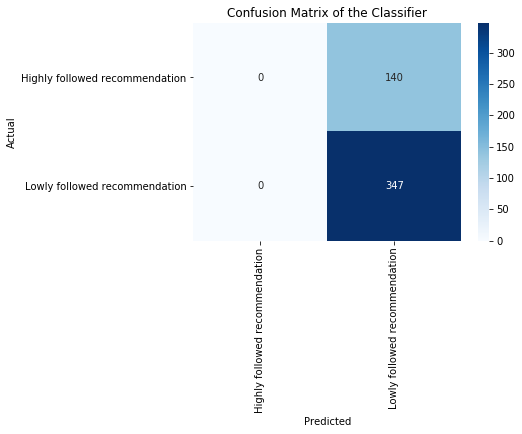

In [89]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['Highly followed recommendation', 'Lowly followed recommendation'])

<b>Area under the curve (AUC)</b>

- Sensitivity<br>
Number of times the model predicted that an event WOULD occur over the number of times the event DID occur.

- Specificity<br>
Number of times the model predicted that an event WOULD NOT occur over the number of times the event DID NOT occur.

In [90]:
# area under the roc curve (auc)
roc_auc_score(y_true  = y_test,
              y_score = logreg_pred)

0.5

In [91]:
# creating an empty list
model_performance = [['Model', 'Training Accuracy',
                      'Testing Accuracy', 'AUC Value']]


# train accuracy
logreg_train_acc  = logreg_fit.score(X_train, y_train).round(4)


# test accuracy
logreg_test_acc   = logreg_fit.score(X_test, y_test).round(4)


# auc value
logreg_auc = roc_auc_score(y_true  = y_test,
                           y_score = logreg_pred).round(4)


# saving the results
model_performance.append(['Logistic Regression',
                          logreg_train_acc,
                          logreg_test_acc,
                          logreg_auc])


# checking the results
for model in model_performance:
    print(model)

['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value']
['Logistic Regression', 0.7142, 0.7125, 0.5]


- <b>KNN Classification Model</b>

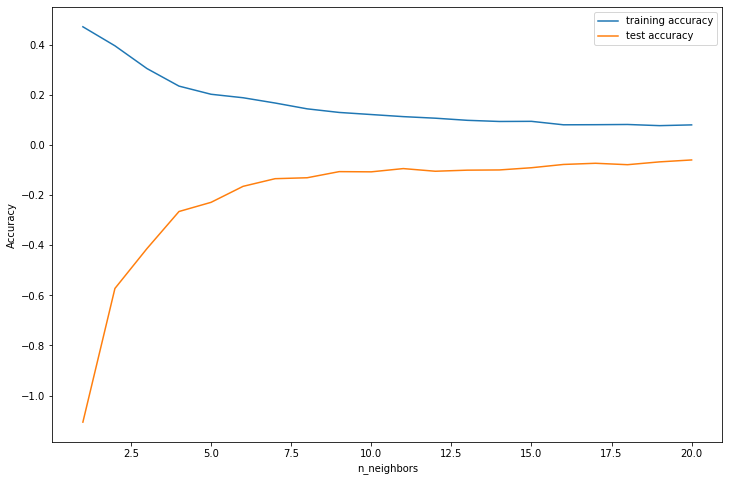

The optimal number of neighbors is: 20


In [92]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(X_data = X_train,
                                  y_data = y_train)

In [93]:
# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(X_train, y_train)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', knn_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))

Training ACCURACY: 0.7156
Testing  ACCURACY: 0.7228
AUC Score        : 0.5264


The model fits well.

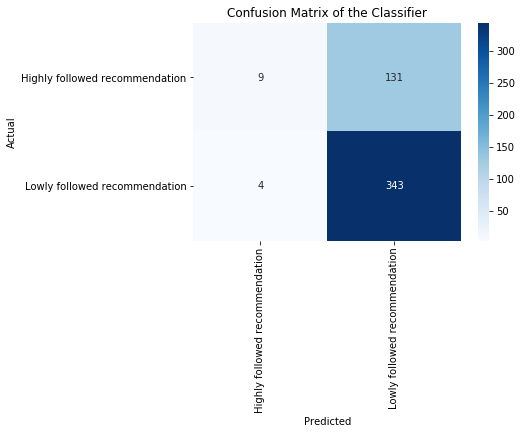

In [94]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = knn_pred,
          labels = ['Highly followed recommendation', 'Lowly followed recommendation'])

In [95]:
# train accuracy
knn_train_acc = knn_fit.score(X_train, y_train).round(4)


# test accuracy
knn_test_acc  = knn_fit.score(X_test, y_test).round(4)


# auc value
knn_auc       = roc_auc_score(y_true  = y_test,
                              y_score = knn_pred).round(4)


# saving the results
model_performance.append(['KNN Classification',
                          knn_train_acc,
                          knn_test_acc,
                          knn_auc])


# checking the results
for model in model_performance:
    print(model)

['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value']
['Logistic Regression', 0.7142, 0.7125, 0.5]
['KNN Classification', 0.7156, 0.7228, 0.5264]


<b>Classification Trees (CART Models)</b>

These user-defined functions will be used later.

In [96]:
########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img

########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = X_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [97]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(X_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(X_test)


# SCORING the model
print('Training ACCURACY:', full_tree_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', full_tree_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_tree_pred).round(4))


Training ACCURACY: 0.8965
Testing  ACCURACY: 0.5955
AUC Score        : 0.5201


The model is super overfitting.

In [98]:
# calling display_tree
display_tree(tree       = full_tree_fit,
             feature_df = X_train)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.725303 to fit



In [99]:
# train accuracy
full_tree_train_acc = full_tree_fit.score(X_train, y_train).round(4)


# test accuracy
full_tree_test_acc = full_tree_fit.score(X_test, y_test).round(4)


# auc value
full_tree_auc = roc_auc_score(y_true  = y_test,
                              y_score = full_tree_pred).round(4)


# saving the results
model_performance.append(['Full Tree',
                          full_tree_train_acc,
                          full_tree_test_acc,
                          full_tree_auc])


# checking the results
for model in model_performance:
    print(model)

['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value']
['Logistic Regression', 0.7142, 0.7125, 0.5]
['KNN Classification', 0.7156, 0.7228, 0.5264]
['Full Tree', 0.8965, 0.5955, 0.5201]


Training ACCURACY: 0.7128
Testing  ACCURACY: 0.7125
AUC Score        : 0.5


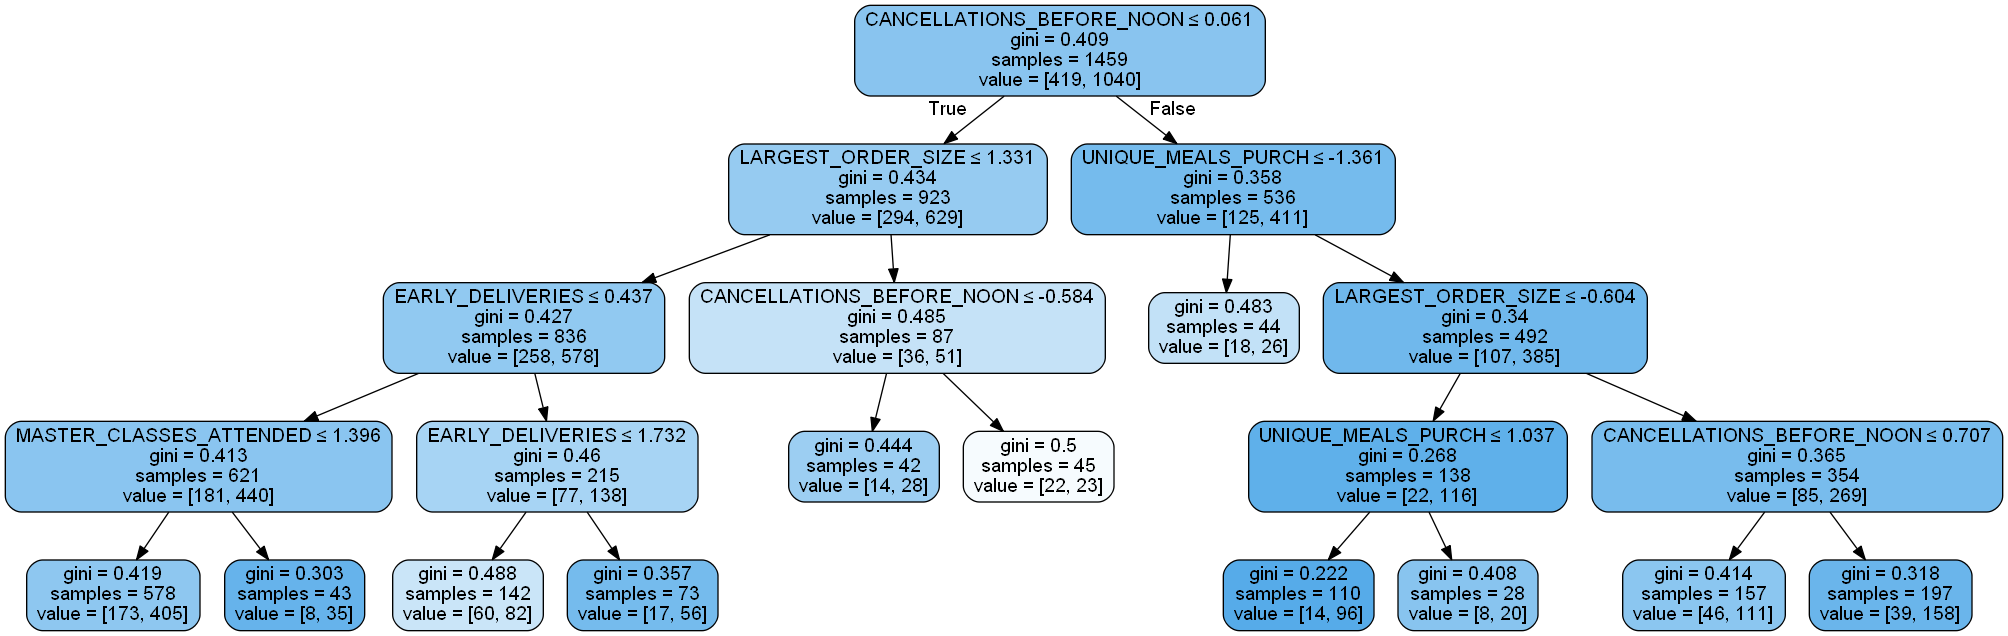

In [100]:
# INSTANTIATING a classification tree object
tree_pruned = DecisionTreeClassifier(max_depth = 4,
                                          min_samples_leaf = 25,
                                          random_state = 222)


# FITTING the training data
tree_pruned_fit = tree_pruned.fit(X_train, y_train)


# PREDICTING on new data
tree_pred = tree_pruned_fit.predict(X_test)


# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pred).round(4))


# calling display_tree
display_tree(tree       = tree_pruned_fit,
             feature_df = X_train,
             height     = 2000,
             width      = 2000)

The model is doing well, with only 0.03% deviance.

C:\Users\isabe\New Folder\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


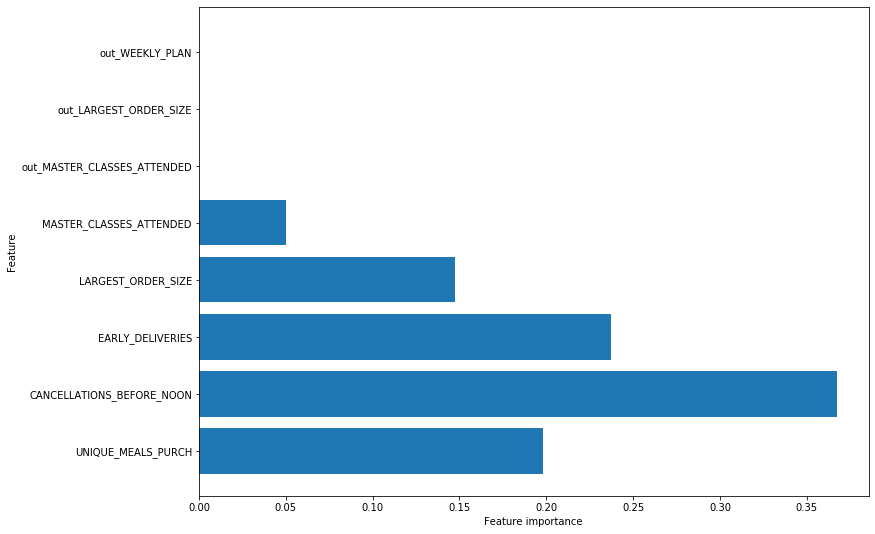

In [101]:
# plotting feature importance
plot_feature_importances(tree_pruned_fit,
                         train = pd.DataFrame(X_train),
                         export = False)

"CANCELLATIONS_BEFORE_NOON", "EARLY_DELIVERIES", "LARGEST_ORDER_SIZE" and "UNIQUE_MEALS_PURCH" and "MASTER_CLASSES_ATTENDED" are the most important features for cross-selling success under the pruned tree model.

In [102]:
# train accuracy
p_tree_train_acc = tree_pruned_fit.score(X_train, y_train).round(4)


# test accuracy
p_tree_test_acc  = tree_pruned_fit.score(X_test, y_test).round(4)


# auc value
p_tree_auc       = roc_auc_score(y_true  = y_test,
                                 y_score = tree_pred).round(4)


# saving the results
model_performance.append(['Pruned Tree',
                          p_tree_train_acc,
                          p_tree_test_acc,
                          p_tree_auc])


# converting to DataFrame and checking the results
pd.DataFrame(model_performance[1:], columns = model_performance[0])

Model  Training Accuracy  Testing Accuracy  AUC Value
0  Logistic Regression             0.7142            0.7125     0.5000
1   KNN Classification             0.7156            0.7228     0.5264
2            Full Tree             0.8965            0.5955     0.5201
3          Pruned Tree             0.7128            0.7125     0.5000

From the perspective of training and testing score and the model fitness, logistic regression model and Pruned Tree are the best.<br>
From the perspective of AUC value, KNN Classification is much better.

In [103]:
# declaring a DataFrame object
model_performance_df = pd.DataFrame(model_performance[1:], columns = model_performance[0])


# saving the DataFrame to Excel
model_performance_df.to_excel('Classification Model Performance.xlsx',
                              index = False)

<b>Hyperparameter Tuning</b>

In [104]:
# loading data
original_df = pd.read_excel('chef_feature_rich.xlsx')

# loading model performance
model_performance = pd.read_excel('Classification Model Performance.xlsx')

- Logistic Regression with Default Hyperparameters

In [105]:
# INSTANTIATING a logistic regression model with default values
lr_default = LogisticRegression(solver = 'lbfgs',
                                C = 1.0,
                                warm_start = False,
                                random_state = 222)

# FITTING the training data
lr_default_fit = lr_default.fit(X_train, y_train)


# PREDICTING based on the testing set
lr_default_pred = lr_default_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', lr_default_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', lr_default_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_default_pred).round(4))

Training ACCURACY: 0.7142
Testing  ACCURACY: 0.7125
AUC Score        : 0.5


- Hyperparameter Tuning with GridSearchCV

In [106]:
# declaring a hyperparameter space
C_space          = pd.np.arange(0.1, 3.0, 0.1) # pd.np.arange(start, step, interval)
warm_start_space = [True, False]


# creating a hyperparameter grid
param_grid = {'C'          : C_space,
              'warm_start' : warm_start_space}


# INSTANTIATING the model object without hyperparameters
lr_tuned = LogisticRegression(solver = 'lbfgs',
                              max_iter = 1000,
                              random_state = 222)


# GridSearchCV object
lr_tuned_cv = GridSearchCV(estimator  = lr_tuned,
                           param_grid = param_grid,
                           cv         = 3,
                           scoring    = make_scorer(roc_auc_score,
                                                    needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
lr_tuned_cv.fit(original_df_data, original_df_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", lr_tuned_cv.best_params_)
print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

C:\Users\isabe\New Folder\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


Tuned Parameters  : {'C': 0.1, 'warm_start': True}
Tuned CV AUC      : 0.5


In [107]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = lr_tuned_cv.best_estimator_


# FIT step is not needed


# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(X_test)


# SCORING the results
print('Training ACCURACY:', lr_tuned.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', lr_tuned.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_pred).round(4))

Training ACCURACY: 0.7128
Testing  ACCURACY: 0.7125
AUC Score        : 0.5


- Logistic Regression with Tuned Hyperparameters

In [108]:
# declaring model performance objects
lr_train_acc = lr_tuned.score(X_train, y_train).round(4)
lr_test_acc  = lr_tuned.score(X_test, y_test).round(4)
lr_auc       = roc_auc_score(y_true  = y_test,
                             y_score = lr_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model'             : 'Tuned LR',
                          'Training Accuracy'  : lr_train_acc,
                          'Testing Accuracy'   : lr_test_acc,
                          'AUC Value'          : lr_auc},
                          ignore_index = True)


# checking the results
model_performance

Model  Training Accuracy  Testing Accuracy  AUC Value
0  Logistic Regression             0.7142            0.7125     0.5000
1   KNN Classification             0.7156            0.7228     0.5264
2            Full Tree             0.8965            0.5955     0.5201
3          Pruned Tree             0.7128            0.7125     0.5000
4             Tuned LR             0.7128            0.7125     0.5000

- Hyperparameter Tuning on Classification Trees

In [109]:
# declaring a hyperparameter space
criterion_space = ['gini', 'entropy']
splitter_space = ['best', 'random']
depth_space = pd.np.arange(1, 25)
leaf_space  = pd.np.arange(1, 100)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_space,
              'splitter'         : splitter_space,
              'max_depth'        : depth_space,
              'min_samples_leaf' : leaf_space}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 222)


# GridSearchCV object
tuned_tree_cv = GridSearchCV(estimator  = tuned_tree,
                             param_grid = param_grid,
                             cv         = 3,
                             scoring    = make_scorer(roc_auc_score,
                                                      needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(original_df_data, original_df_target)


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

C:\Users\isabe\New Folder\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  after removing the cwd from sys.path.
C:\Users\isabe\New Folder\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """


Tuned Parameters  : {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'splitter': 'random'}
Tuned Training AUC: 0.5286


In [110]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = tuned_tree_cv.best_estimator_


# FIT step is not needed


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(X_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))

Training ACCURACY: 0.6635
Testing  ACCURACY: 0.6653
AUC Score        : 0.5265


In [111]:
# declaring model performance objects
tree_train_acc = tree_tuned.score(X_train, y_train).round(4)
tree_test_acc  = tree_tuned.score(X_test, y_test).round(4)
tree_auc       = roc_auc_score(y_true  = y_test,
                              y_score = tree_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model'             : 'Tuned Tree',
                          'Training Accuracy'  : tree_train_acc,
                          'Testing Accuracy'   : tree_test_acc,
                          'AUC Value'          : tree_auc},
                          ignore_index = True)


# checking the results
model_performance

Model  Training Accuracy  Testing Accuracy  AUC Value
0  Logistic Regression             0.7142            0.7125     0.5000
1   KNN Classification             0.7156            0.7228     0.5264
2            Full Tree             0.8965            0.5955     0.5201
3          Pruned Tree             0.7128            0.7125     0.5000
4             Tuned LR             0.7128            0.7125     0.5000
5           Tuned Tree             0.6635            0.6653     0.5265

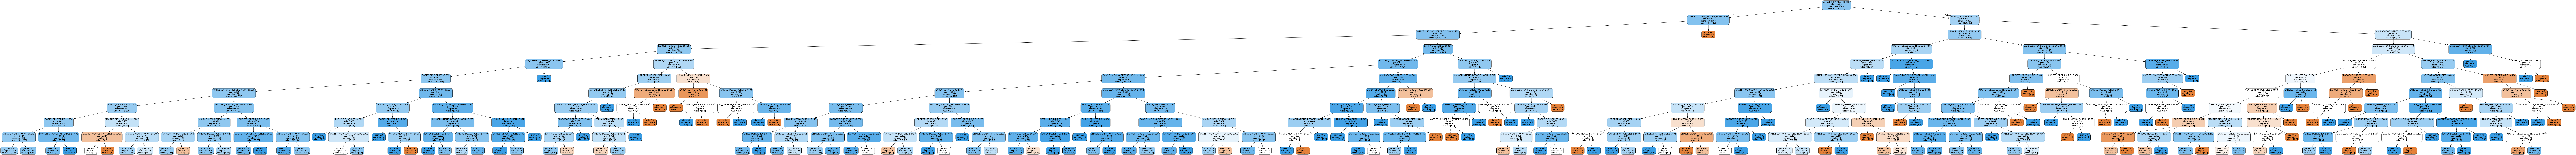

In [112]:
# displaying the tree
display_tree(tree = tree_tuned,
             feature_df = original_df_data,
             height = 2000,
             width  = 2000)

In [113]:
# saving the DataFrame to Excel
model_performance.to_excel('Classification Model Performance.xlsx',
                           index = False)

- Random Forest

In [114]:
# loading data
original_df = pd.read_excel('chef_feature_rich.xlsx')

# loading model performance
model_performance = pd.read_excel('Classification Model Performance.xlsx')

In [115]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = "gini",
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 222)

# FITTING the training data
rf_default_fit = rf_default.fit(X_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 0.8965
Testing  ACCURACY: 0.6612
AUC Score        : 0.5023


The model is super overfitting.

C:\Users\isabe\New Folder\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


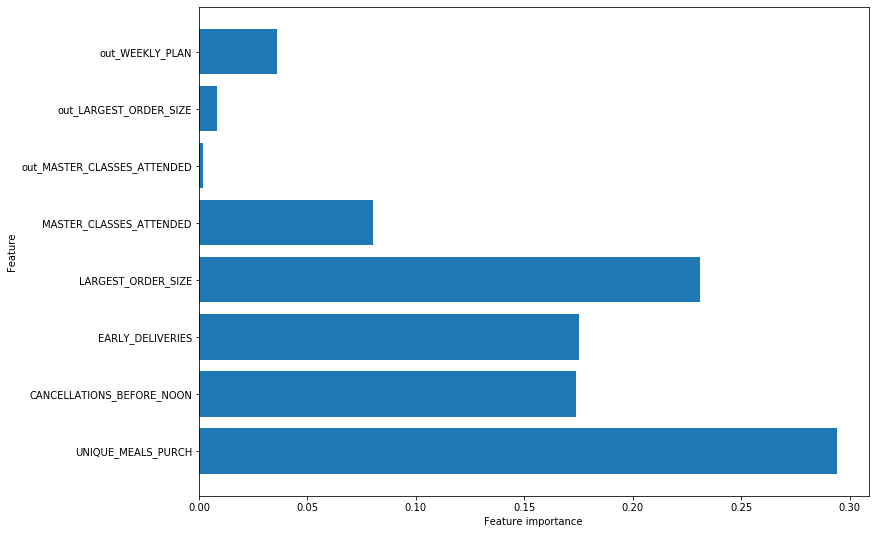

In [116]:
# plotting feature importance
plot_feature_importances(model = rf_default_fit,
                         train = X_train)

"UNIQUE_MEALS_PURCH", "CANCELLATIONS_BEFORE_NOON", "LARGEST_ORDER_SIZE" and "EARLY DELIVERIES" are still the most important features for cross-selling success under the random forest model.

In [117]:
# declaring model performance objects
rf_train_acc = rf_default_fit.score(X_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(X_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model'             : 'Random Forest',
                          'Training Accuracy'  : rf_train_acc,
                          'Testing Accuracy'   : rf_test_acc,
                          'AUC Value'          : rf_auc},
                          ignore_index = True)


# checking the results
model_performance

Model  Training Accuracy  Testing Accuracy  AUC Value
0  Logistic Regression             0.7142            0.7125     0.5000
1   KNN Classification             0.7156            0.7228     0.5264
2            Full Tree             0.8965            0.5955     0.5201
3          Pruned Tree             0.7128            0.7125     0.5000
4             Tuned LR             0.7128            0.7125     0.5000
5           Tuned Tree             0.6635            0.6653     0.5265
6        Random Forest             0.8965            0.6612     0.5023

In [118]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = X_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

- Random Forest with Tuned Hyperparameters

In [119]:
# declaring a hyperparameter space
estimator_space  = pd.np.arange(100, 1100, 250)
leaf_space       = pd.np.arange(1, 31, 10)
criterion_space  = ['gini', 'entropy']
bootstrap_space  = [True, False]
warm_start_space = [True, False]


# creating a hyperparameter grid
param_grid = {'n_estimators'     : estimator_space,
              'min_samples_leaf' : leaf_space,
              'criterion'        : criterion_space,
              'bootstrap'        : bootstrap_space,
              'warm_start'       : warm_start_space}


# INSTANTIATING the model object without hyperparameters
full_forest_grid = RandomForestClassifier(random_state = 222)


# GridSearchCV object
full_forest_cv = GridSearchCV(estimator  = full_forest_grid,
                              param_grid = param_grid,
                              cv         = 3,
                              scoring    = make_scorer(roc_auc_score,
                                           needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
full_forest_cv.fit(original_df_data, original_df_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", full_forest_cv.best_params_)
print("Tuned Training AUC:", full_forest_cv.best_score_.round(4))

C:\Users\isabe\New Folder\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
C:\Users\isabe\New Folder\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until


Tuned Parameters  : {'bootstrap': False, 'criterion': 'entropy', 'min_samples_leaf': 1, 'n_estimators': 850, 'warm_start': True}
Tuned Training AUC: 0.5012


In [120]:
# INSTANTIATING the model object without hyperparameters
rf_tuned = RandomForestClassifier(bootstrap        = False,
                                  criterion        = 'entropy',
                                  min_samples_leaf = 1,
                                  n_estimators     = 850,
                                  warm_start       = True,
                                  random_state     = 222)


# FIT step is needed as we are not using .best_estimator
rf_tuned_fit = rf_tuned.fit(X_train, y_train)


# PREDICTING based on the testing set
rf_tuned_pred = rf_tuned_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', rf_tuned_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', rf_tuned_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_tuned_pred).round(4))

Training ACCURACY: 0.8965
Testing  ACCURACY: 0.5996
AUC Score        : 0.4911


The model is overfitting.

- Gradient Boosted Machines

In [121]:
# INSTANTIATING the model object without hyperparameters (by default)
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 222)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(X_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(X_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.7409
Testing ACCURACY : 0.7084
AUC Score        : 0.5035


In [122]:
# declaring model performance objects
gbm_train_acc = full_gbm_default_fit.score(X_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(X_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model'             : 'GBM',
                          'Training Accuracy'  : gbm_train_acc,
                          'Testing Accuracy'   : gbm_test_acc,
                          'AUC Value'          : gbm_auc},
                          ignore_index = True)


# checking the results
model_performance

Model  Training Accuracy  Testing Accuracy  AUC Value
0  Logistic Regression             0.7142            0.7125     0.5000
1   KNN Classification             0.7156            0.7228     0.5264
2            Full Tree             0.8965            0.5955     0.5201
3          Pruned Tree             0.7128            0.7125     0.5000
4             Tuned LR             0.7128            0.7125     0.5000
5           Tuned Tree             0.6635            0.6653     0.5265
6        Random Forest             0.8965            0.6612     0.5023
7                  GBM             0.7409            0.7084     0.5035

In [123]:
# declaring a hyperparameter space
learn_space     = pd.np.arange(0.1, 1.6, 0.3)
estimator_space = pd.np.arange(50, 250, 50)
depth_space     = pd.np.arange(1, 10)


# creating a hyperparameter grid
param_grid = {'learning_rate' : learn_space,
              'max_depth'     : depth_space,
              'n_estimators'  : estimator_space}


# INSTANTIATING the model object without hyperparameters
full_gbm_grid = GradientBoostingClassifier(random_state = 222)


# GridSearchCV object
full_gbm_cv = GridSearchCV(estimator  = full_gbm_grid,
                           param_grid = param_grid,
                           cv         = 3,
                           scoring    = make_scorer(roc_auc_score,
                                        needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
full_gbm_cv.fit(original_df_data, original_df_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", full_gbm_cv.best_params_)
print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

C:\Users\isabe\New Folder\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
C:\Users\isabe\New Folder\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\isabe\New Folder\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  after removing the cwd from sys.path.


Tuned Parameters  : {'learning_rate': 0.7000000000000001, 'max_depth': 2, 'n_estimators': 100}
Tuned Training AUC: 0.5185


In [124]:
# INSTANTIATING the model object without hyperparameters
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.7000000000000001,
                                       max_depth     = 2,
                                       n_estimators  = 100,
                                       random_state  = 222)


# FIT step is needed as we are not using .best_estimator
gbm_tuned_fit = gbm_tuned.fit(X_train, y_train)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))

Training ACCURACY: 0.7587
Testing  ACCURACY: 0.7146
AUC Score        : 0.5227


In [125]:
# declaring model performance objects
gbm_train_acc = gbm_tuned_fit.score(X_train, y_train).round(4)
gbm_test_acc  = gbm_tuned_fit.score(X_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = gbm_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model'             : 'Tuned GBM',
                          'Training Accuracy'  : gbm_train_acc,
                          'Testing Accuracy'   : gbm_test_acc,
                          'AUC Value'          : gbm_auc},
                          ignore_index = True)


# checking the results
model_performance

Model  Training Accuracy  Testing Accuracy  AUC Value
0  Logistic Regression             0.7142            0.7125     0.5000
1   KNN Classification             0.7156            0.7228     0.5264
2            Full Tree             0.8965            0.5955     0.5201
3          Pruned Tree             0.7128            0.7125     0.5000
4             Tuned LR             0.7128            0.7125     0.5000
5           Tuned Tree             0.6635            0.6653     0.5265
6        Random Forest             0.8965            0.6612     0.5023
7                  GBM             0.7409            0.7084     0.5035
8            Tuned GBM             0.7587            0.7146     0.5227

- Extreme Gradient Boosting

In [126]:
# INSTANTIATING the model object without hyperparameters
full_xgb_default = XGBClassifier(loss          = 'deviance',
                                 learning_rate = 0.1,
                                 n_estimators  = 100,
                                 criterion     = 'friedman_mse',
                                 max_depth     = 3,
                                 warm_start    = False,
                                 random_state  = 222)


# FIT step is needed as we are not using .best_estimator
full_xgb_default_fit = full_xgb_default.fit(X_train, y_train)


# PREDICTING based on the testing set
full_xgb_default_pred = full_xgb_default_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', full_xgb_default_fit.score(X_train, y_train).round(4))
print('Testing ACCURACY :', full_xgb_default_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_xgb_default_pred).round(4))

Training ACCURACY: 0.7313
Testing ACCURACY : 0.7084
AUC Score        : 0.5014


In [127]:
# declaring model performance objects
xgb_train_acc = full_xgb_default_fit.score(X_train, y_train).round(4)
xgb_test_acc  = full_xgb_default_fit.score(X_test, y_test).round(4)
xgb_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_xgb_default_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model'             : 'XGB',
                          'Training Accuracy'  : xgb_train_acc,
                          'Testing Accuracy'   : xgb_test_acc,
                          'AUC Value'          : xgb_auc},
                          ignore_index = True)


# checking the results
model_performance

Model  Training Accuracy  Testing Accuracy  AUC Value
0  Logistic Regression             0.7142            0.7125     0.5000
1   KNN Classification             0.7156            0.7228     0.5264
2            Full Tree             0.8965            0.5955     0.5201
3          Pruned Tree             0.7128            0.7125     0.5000
4             Tuned LR             0.7128            0.7125     0.5000
5           Tuned Tree             0.6635            0.6653     0.5265
6        Random Forest             0.8965            0.6612     0.5023
7                  GBM             0.7409            0.7084     0.5035
8            Tuned GBM             0.7587            0.7146     0.5227
9                  XGB             0.7313            0.7084     0.5014

In [128]:
# declaring a hyperparameter space
learn_space     = pd.np.arange(0.1, 1.6, 0.3)
estimator_space = pd.np.arange(50, 250, 50)
depth_space     = pd.np.arange(1, 10)


# creating a hyperparameter grid
param_grid = {'learning_rate' : learn_space,
              'max_depth'     : depth_space,
              'n_estimators'  : estimator_space}


# INSTANTIATING the model object without hyperparameters
full_xgb_grid = XGBClassifier(random_state = 222)


# GridSearchCV object
full_xgb_cv = GridSearchCV(estimator  = full_xgb_grid,
                           param_grid = param_grid,
                           cv         = 3,
                           scoring    = make_scorer(roc_auc_score,
                                        needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
full_xgb_cv.fit(original_df_data, original_df_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", full_xgb_cv.best_params_)
print("Tuned Training AUC:", full_xgb_cv.best_score_.round(4))

C:\Users\isabe\New Folder\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
C:\Users\isabe\New Folder\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\isabe\New Folder\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  after removing the cwd from sys.path.


Tuned Parameters  : {'learning_rate': 1.0000000000000002, 'max_depth': 2, 'n_estimators': 50}
Tuned Training AUC: 0.5253


In [129]:
# INSTANTIATING the model object without hyperparameters
xgb_tuned = XGBClassifier(learning_rate = 1.0000000000000002,
                          max_depth     = 2,
                          n_estimators  = 50,
                          random_state  = 222)


# FIT step is needed as we are not using .best_estimator
xgb_tuned_fit = xgb_tuned.fit(X_train, y_train)


# PREDICTING based on the testing set
xgb_tuned_pred = xgb_tuned_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', xgb_tuned_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', xgb_tuned_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = xgb_tuned_pred).round(4))

Training ACCURACY: 0.7423
Testing  ACCURACY: 0.7064
AUC Score        : 0.5149


In [130]:
# declaring model performance objects
xgb_train_acc = xgb_tuned_fit.score(X_train, y_train).round(4)
xgb_test_acc  = xgb_tuned_fit.score(X_test, y_test).round(4)
xgb_auc       = roc_auc_score(y_true  = y_test,
                              y_score = xgb_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model'             : 'Tuned XGB',
                          'Training Accuracy'  : xgb_train_acc,
                          'Testing Accuracy'   : xgb_test_acc,
                          'AUC Value'          : xgb_auc},
                          ignore_index = True)


# checking the results
model_performance

Model  Training Accuracy  Testing Accuracy  AUC Value
0   Logistic Regression             0.7142            0.7125     0.5000
1    KNN Classification             0.7156            0.7228     0.5264
2             Full Tree             0.8965            0.5955     0.5201
3           Pruned Tree             0.7128            0.7125     0.5000
4              Tuned LR             0.7128            0.7125     0.5000
5            Tuned Tree             0.6635            0.6653     0.5265
6         Random Forest             0.8965            0.6612     0.5023
7                   GBM             0.7409            0.7084     0.5035
8             Tuned GBM             0.7587            0.7146     0.5227
9                   XGB             0.7313            0.7084     0.5014
10            Tuned XGB             0.7423            0.7064     0.5149

In [131]:
model_performance.sort_values(by = 'AUC Value',
                              ascending = False)

Model  Training Accuracy  Testing Accuracy  AUC Value
5            Tuned Tree             0.6635            0.6653     0.5265
1    KNN Classification             0.7156            0.7228     0.5264
8             Tuned GBM             0.7587            0.7146     0.5227
2             Full Tree             0.8965            0.5955     0.5201
10            Tuned XGB             0.7423            0.7064     0.5149
7                   GBM             0.7409            0.7084     0.5035
6         Random Forest             0.8965            0.6612     0.5023
9                   XGB             0.7313            0.7084     0.5014
0   Logistic Regression             0.7142            0.7125     0.5000
3           Pruned Tree             0.7128            0.7125     0.5000
4              Tuned LR             0.7128            0.7125     0.5000

Regarding to the AUC score, Tuned Tree is the best model.

In [132]:
# saving the DataFrame to Excel
model_performance.to_excel('Classification Model Performance.xlsx',
                           index = False)